<a href="https://colab.research.google.com/github/a20121248/aprendizaje_automatico/blob/main/Titanic_20121248.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
#Instalaciones para graficar los árboles
!sudo apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


**Algunos hotkeys útiles en Colaboratory:**

* **control+enter**: correr celda.
* **enter**: editar celda (modo edición).
* **escape**: salir del modo edición.
* **control+s**: guardar notebook.

**Fuera del modo edición se pueden utilizar los siguientes hotkeys:**
* **control+m+a**: agregar celda arriba.
* **control+m+b**: agregar celda abajo.
* **control+m+d**: borrar celda.
* **control+shift+z**: deshacer borrar celda.
* **control+m+y**: establecer celda en modo python (código).
* **control+m+m**: establecer celda en modo markdown (texto).
* **control+m+o**: mostrar/ocultar resultado.

**Cheat sheets de librerías:**

* **Jupyter notebook**: Entorno de trabajo [(Cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Jupyter_Notebook_Cheat_Sheet.pdf)
* **Numpy**: librería de funciones matemáticas de alto nivel para operar con vectores y matrices [(Cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* **Pandas**: librería destinada al análisis de datos, permiten trabajar con datos estructurados de forma muy eficiente [(Cheat sheet)](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* **Matplotlib**: librería para la generación de gráficos [(Cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
* **Seaborn**: librería para la generación de gráficos de alto nivel, por debajo usa Matplotlib [(Ejemplos)](https://seaborn.pydata.org/examples/index.html)

Los cheatsheets son un resumen de las principales funciones de las librerías

Pueden revisar la documentación de cualquier módulo o función agregando un signo de pregunta y ejecutando la celda; por ejemplo:

```
#Agregar el signo de pregunta y entonces ejecutar la celda
pd.read_csv?
```



In [2]:
!pip install --upgrade statsmodels

In [3]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", 50)

%matplotlib inline

# Dataset

Usaremos el titanic dataset, el cual está disponible en:
<br/>
<br/>
https://www.kaggle.com/c/titanic/data
<br/>
<br/>
Nuestro objetivo será predecir si un pasajero sobrevivió o no al hundimiento del Titanic

**Descripción de la data:**

>Variable | Definition | Key
>--- | --- | ---
>survival | Survival | 0 = No, 1 = Yes
>pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
>sex | Sex
>Age | Age in years
>sibsp | # of siblings / spouses aboard the Titanic
>parch | # of parents / children aboard the Titanic
>ticket | Ticket number
>fare | Passenger fare
>cabin | Cabin number
>embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

Específicamente haremos uso del "train.csv" y "test.csv", los cuales se generarán al ejecutar las siguientes celdas:

In [4]:
#@title Titanic Dataset: titanic_train.csv
%%writefile titanic_train.csv
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.05,,S
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.275,,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome) ",female,55,0,0,248706,16,,S
17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.125,,Q
18,1,2,"Williams, Mr. Charles Eugene",male,,0,0,244373,13,,S
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31,1,0,345763,18,,S
20,1,3,"Masselmani, Mrs. Fatima",female,,0,0,2649,7.225,,C
21,0,2,"Fynney, Mr. Joseph J",male,35,0,0,239865,26,,S
22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13,D56,S
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,,Q
24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5,A6,S
25,0,3,"Palsson, Miss. Torborg Danira",female,8,3,1,349909,21.075,,S
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)",female,38,1,5,347077,31.3875,,S
27,0,3,"Emir, Mr. Farred Chehab",male,,0,0,2631,7.225,,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263,C23 C25 C27,S
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,,0,0,330959,7.8792,,Q
30,0,3,"Todoroff, Mr. Lalio",male,,0,0,349216,7.8958,,S
31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,,C
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,,1,0,PC 17569,146.5208,B78,C
33,1,3,"Glynn, Miss. Mary Agatha",female,,0,0,335677,7.75,,Q
34,0,2,"Wheadon, Mr. Edward H",male,66,0,0,C.A. 24579,10.5,,S
35,0,1,"Meyer, Mr. Edgar Joseph",male,28,1,0,PC 17604,82.1708,,C
36,0,1,"Holverson, Mr. Alexander Oskar",male,42,1,0,113789,52,,S
37,1,3,"Mamee, Mr. Hanna",male,,0,0,2677,7.2292,,C
38,0,3,"Cann, Mr. Ernest Charles",male,21,0,0,A./5. 2152,8.05,,S
39,0,3,"Vander Planke, Miss. Augusta Maria",female,18,2,0,345764,18,,S
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14,1,0,2651,11.2417,,C
41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40,1,0,7546,9.475,,S
42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27,1,0,11668,21,,S
43,0,3,"Kraeff, Mr. Theodor",male,,0,0,349253,7.8958,,C
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3,1,2,SC/Paris 2123,41.5792,,C
45,1,3,"Devaney, Miss. Margaret Delia",female,19,0,0,330958,7.8792,,Q
46,0,3,"Rogers, Mr. William John",male,,0,0,S.C./A.4. 23567,8.05,,S
47,0,3,"Lennon, Mr. Denis",male,,1,0,370371,15.5,,Q
48,1,3,"O'Driscoll, Miss. Bridget",female,,0,0,14311,7.75,,Q
49,0,3,"Samaan, Mr. Youssef",male,,2,0,2662,21.6792,,C
50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18,1,0,349237,17.8,,S
51,0,3,"Panula, Master. Juha Niilo",male,7,4,1,3101295,39.6875,,S
52,0,3,"Nosworthy, Mr. Richard Cater",male,21,0,0,A/4. 39886,7.8,,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C
54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)",female,29,1,0,2926,26,,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65,0,1,113509,61.9792,B30,C
56,1,1,"Woolner, Mr. Hugh",male,,0,0,19947,35.5,C52,S
57,1,2,"Rugg, Miss. Emily",female,21,0,0,C.A. 31026,10.5,,S
58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,,C
59,1,2,"West, Miss. Constance Mirium",female,5,1,2,C.A. 34651,27.75,,S
60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9,,S
61,0,3,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7.2292,,C
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
63,0,1,"Harris, Mr. Henry Birkhardt",male,45,1,0,36973,83.475,C83,S
64,0,3,"Skoog, Master. Harald",male,4,3,2,347088,27.9,,S
65,0,1,"Stewart, Mr. Albert A",male,,0,0,PC 17605,27.7208,,C
66,1,3,"Moubarek, Master. Gerios",male,,1,1,2661,15.2458,,C
67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29,0,0,C.A. 29395,10.5,F33,S
68,0,3,"Crease, Mr. Ernest James",male,19,0,0,S.P. 3464,8.1583,,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17,4,2,3101281,7.925,,S
70,0,3,"Kink, Mr. Vincenz",male,26,2,0,315151,8.6625,,S
71,0,2,"Jenkin, Mr. Stephen Curnow",male,32,0,0,C.A. 33111,10.5,,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9,,S
73,0,2,"Hood, Mr. Ambrose Jr",male,21,0,0,S.O.C. 14879,73.5,,S
74,0,3,"Chronopoulos, Mr. Apostolos",male,26,1,0,2680,14.4542,,C
75,1,3,"Bing, Mr. Lee",male,32,0,0,1601,56.4958,,S
76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.65,F G73,S
77,0,3,"Staneff, Mr. Ivan",male,,0,0,349208,7.8958,,S
78,0,3,"Moutal, Mr. Rahamin Haim",male,,0,0,374746,8.05,,S
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,,S
80,1,3,"Dowdell, Miss. Elizabeth",female,30,0,0,364516,12.475,,S
81,0,3,"Waelens, Mr. Achille",male,22,0,0,345767,9,,S
82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29,0,0,345779,9.5,,S
83,1,3,"McDermott, Miss. Brigdet Delia",female,,0,0,330932,7.7875,,Q
84,0,1,"Carrau, Mr. Francisco M",male,28,0,0,113059,47.1,,S
85,1,2,"Ilett, Miss. Bertha",female,17,0,0,SO/C 14885,10.5,,S
86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)",female,33,3,0,3101278,15.85,,S
87,0,3,"Ford, Mr. William Neal",male,16,1,3,W./C. 6608,34.375,,S
88,0,3,"Slocovski, Mr. Selman Francis",male,,0,0,SOTON/OQ 392086,8.05,,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263,C23 C25 C27,S
90,0,3,"Celotti, Mr. Francesco",male,24,0,0,343275,8.05,,S
91,0,3,"Christmann, Mr. Emil",male,29,0,0,343276,8.05,,S
92,0,3,"Andreasson, Mr. Paul Edvin",male,20,0,0,347466,7.8542,,S
93,0,1,"Chaffee, Mr. Herbert Fuller",male,46,1,0,W.E.P. 5734,61.175,E31,S
94,0,3,"Dean, Mr. Bertram Frank",male,26,1,2,C.A. 2315,20.575,,S
95,0,3,"Coxon, Mr. Daniel",male,59,0,0,364500,7.25,,S
96,0,3,"Shorney, Mr. Charles Joseph",male,,0,0,374910,8.05,,S
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C
98,1,1,"Greenfield, Mr. William Bertram",male,23,0,1,PC 17759,63.3583,D10 D12,C
99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34,0,1,231919,23,,S
100,0,2,"Kantor, Mr. Sinai",male,34,1,0,244367,26,,S
101,0,3,"Petranec, Miss. Matilda",female,28,0,0,349245,7.8958,,S
102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,,0,0,349215,7.8958,,S
103,0,1,"White, Mr. Richard Frasar",male,21,0,1,35281,77.2875,D26,S
104,0,3,"Johansson, Mr. Gustaf Joel",male,33,0,0,7540,8.6542,,S
105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37,2,0,3101276,7.925,,S
106,0,3,"Mionoff, Mr. Stoytcho",male,28,0,0,349207,7.8958,,S
107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21,0,0,343120,7.65,,S
108,1,3,"Moss, Mr. Albert Johan",male,,0,0,312991,7.775,,S
109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,,S
110,1,3,"Moran, Miss. Bertha",female,,1,0,371110,24.15,,Q
111,0,1,"Porter, Mr. Walter Chamberlain",male,47,0,0,110465,52,C110,S
112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,,C
113,0,3,"Barton, Mr. David John",male,22,0,0,324669,8.05,,S
114,0,3,"Jussila, Miss. Katriina",female,20,1,0,4136,9.825,,S
115,0,3,"Attalah, Miss. Malake",female,17,0,0,2627,14.4583,,C
116,0,3,"Pekoniemi, Mr. Edvard",male,21,0,0,STON/O 2. 3101294,7.925,,S
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,,Q
118,0,2,"Turpin, Mr. William John Robert",male,29,1,0,11668,21,,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24,0,1,PC 17558,247.5208,B58 B60,C
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2,4,2,347082,31.275,,S
121,0,2,"Hickman, Mr. Stanley George",male,21,2,0,S.O.C. 14879,73.5,,S
122,0,3,"Moore, Mr. Leonard Charles",male,,0,0,A4. 54510,8.05,,S
123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,,C
124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13,E101,S
125,0,1,"White, Mr. Percival Wayland",male,54,0,1,35281,77.2875,D26,S
126,1,3,"Nicola-Yarred, Master. Elias",male,12,1,0,2651,11.2417,,C
127,0,3,"McMahon, Mr. Martin",male,,0,0,370372,7.75,,Q
128,1,3,"Madsen, Mr. Fridtjof Arne",male,24,0,0,C 17369,7.1417,,S
129,1,3,"Peter, Miss. Anna",female,,1,1,2668,22.3583,F E69,C
130,0,3,"Ekstrom, Mr. Johan",male,45,0,0,347061,6.975,,S
131,0,3,"Drazenoic, Mr. Jozef",male,33,0,0,349241,7.8958,,C
132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20,0,0,SOTON/O.Q. 3101307,7.05,,S
133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47,1,0,A/5. 3337,14.5,,S
134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29,1,0,228414,26,,S
135,0,2,"Sobey, Mr. Samuel James Hayden",male,25,0,0,C.A. 29178,13,,S
136,0,2,"Richard, Mr. Emile",male,23,0,0,SC/PARIS 2133,15.0458,,C
137,1,1,"Newsom, Miss. Helen Monypeny",female,19,0,2,11752,26.2833,D47,S
138,0,1,"Futrelle, Mr. Jacques Heath",male,37,1,0,113803,53.1,C123,S
139,0,3,"Osen, Mr. Olaf Elon",male,16,0,0,7534,9.2167,,S
140,0,1,"Giglio, Mr. Victor",male,24,0,0,PC 17593,79.2,B86,C
141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,,0,2,2678,15.2458,,C
142,1,3,"Nysten, Miss. Anna Sofia",female,22,0,0,347081,7.75,,S
143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)",female,24,1,0,STON/O2. 3101279,15.85,,S
144,0,3,"Burke, Mr. Jeremiah",male,19,0,0,365222,6.75,,Q
145,0,2,"Andrew, Mr. Edgardo Samuel",male,18,0,0,231945,11.5,,S
146,0,2,"Nicholls, Mr. Joseph Charles",male,19,1,1,C.A. 33112,36.75,,S
147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27,0,0,350043,7.7958,,S
148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9,2,2,W./C. 6608,34.375,,S
149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26,F2,S
150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42,0,0,244310,13,,S
151,0,2,"Bateman, Rev. Robert James",male,51,0,0,S.O.P. 1166,12.525,,S
152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22,1,0,113776,66.6,C2,S
153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.05,,S
154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5,,S
155,0,3,"Olsen, Mr. Ole Martin",male,,0,0,Fa 265302,7.3125,,S
156,0,1,"Williams, Mr. Charles Duane",male,51,0,1,PC 17597,61.3792,,C
157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16,0,0,35851,7.7333,,Q
158,0,3,"Corn, Mr. Harry",male,30,0,0,SOTON/OQ 392090,8.05,,S
159,0,3,"Smiljanic, Mr. Mile",male,,0,0,315037,8.6625,,S
160,0,3,"Sage, Master. Thomas Henry",male,,8,2,CA. 2343,69.55,,S
161,0,3,"Cribb, Mr. John Hatfield",male,44,0,1,371362,16.1,,S
162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Milne)",female,40,0,0,C.A. 33595,15.75,,S
163,0,3,"Bengtsson, Mr. John Viktor",male,26,0,0,347068,7.775,,S
164,0,3,"Calic, Mr. Jovo",male,17,0,0,315093,8.6625,,S
165,0,3,"Panula, Master. Eino Viljami",male,1,4,1,3101295,39.6875,,S
166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9,0,2,363291,20.525,,S
167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,,0,1,113505,55,E33,S
168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45,1,4,347088,27.9,,S
169,0,1,"Baumann, Mr. John D",male,,0,0,PC 17318,25.925,,S
170,0,3,"Ling, Mr. Lee",male,28,0,0,1601,56.4958,,S
171,0,1,"Van der hoef, Mr. Wyckoff",male,61,0,0,111240,33.5,B19,S
172,0,3,"Rice, Master. Arthur",male,4,4,1,382652,29.125,,Q
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1,1,1,347742,11.1333,,S
174,0,3,"Sivola, Mr. Antti Wilhelm",male,21,0,0,STON/O 2. 3101280,7.925,,S
175,0,1,"Smith, Mr. James Clinch",male,56,0,0,17764,30.6958,A7,C
176,0,3,"Klasen, Mr. Klas Albin",male,18,1,1,350404,7.8542,,S
177,0,3,"Lefebre, Master. Henry Forbes",male,,3,1,4133,25.4667,,S
178,0,1,"Isham, Miss. Ann Elizabeth",female,50,0,0,PC 17595,28.7125,C49,C
179,0,2,"Hale, Mr. Reginald",male,30,0,0,250653,13,,S
180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,,S
181,0,3,"Sage, Miss. Constance Gladys",female,,8,2,CA. 2343,69.55,,S
182,0,2,"Pernot, Mr. Rene",male,,0,0,SC/PARIS 2131,15.05,,C
183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9,4,2,347077,31.3875,,S
184,1,2,"Becker, Master. Richard F",male,1,2,1,230136,39,F4,S
185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4,0,2,315153,22.025,,S
186,0,1,"Rood, Mr. Hugh Roscoe",male,,0,0,113767,50,A32,S
187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,,1,0,370365,15.5,,Q
188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45,0,0,111428,26.55,,S
189,0,3,"Bourke, Mr. John",male,40,1,1,364849,15.5,,Q
190,0,3,"Turcin, Mr. Stjepan",male,36,0,0,349247,7.8958,,S
191,1,2,"Pinsky, Mrs. (Rosa)",female,32,0,0,234604,13,,S
192,0,2,"Carbines, Mr. William",male,19,0,0,28424,13,,S
193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19,1,0,350046,7.8542,,S
194,1,2,"Navratil, Master. Michel M",male,3,1,1,230080,26,F2,S
195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44,0,0,PC 17610,27.7208,B4,C
196,1,1,"Lurette, Miss. Elise",female,58,0,0,PC 17569,146.5208,B80,C
197,0,3,"Mernagh, Mr. Robert",male,,0,0,368703,7.75,,Q
198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42,0,1,4579,8.4042,,S
199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,,0,0,370370,7.75,,Q
200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0,0,248747,13,,S
201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28,0,0,345770,9.5,,S
202,0,3,"Sage, Mr. Frederick",male,,8,2,CA. 2343,69.55,,S
203,0,3,"Johanson, Mr. Jakob Alfred",male,34,0,0,3101264,6.4958,,S
204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.225,,C
205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18,0,0,A/5 3540,8.05,,S
206,0,3,"Strom, Miss. Telma Matilda",female,2,0,1,347054,10.4625,G6,S
207,0,3,"Backstrom, Mr. Karl Alfred",male,32,1,0,3101278,15.85,,S
208,1,3,"Albimona, Mr. Nassef Cassem",male,26,0,0,2699,18.7875,,C
209,1,3,"Carr, Miss. Helen ""Ellen""",female,16,0,0,367231,7.75,,Q
210,1,1,"Blank, Mr. Henry",male,40,0,0,112277,31,A31,C
211,0,3,"Ali, Mr. Ahmed",male,24,0,0,SOTON/O.Q. 3101311,7.05,,S
212,1,2,"Cameron, Miss. Clear Annie",female,35,0,0,F.C.C. 13528,21,,S
213,0,3,"Perkin, Mr. John Henry",male,22,0,0,A/5 21174,7.25,,S
214,0,2,"Givard, Mr. Hans Kristensen",male,30,0,0,250646,13,,S
215,0,3,"Kiernan, Mr. Philip",male,,1,0,367229,7.75,,Q
216,1,1,"Newell, Miss. Madeleine",female,31,1,0,35273,113.275,D36,C
217,1,3,"Honkanen, Miss. Eliina",female,27,0,0,STON/O2. 3101283,7.925,,S
218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42,1,0,243847,27,,S
219,1,1,"Bazzani, Miss. Albina",female,32,0,0,11813,76.2917,D15,C
220,0,2,"Harris, Mr. Walter",male,30,0,0,W/C 14208,10.5,,S
221,1,3,"Sunderland, Mr. Victor Francis",male,16,0,0,SOTON/OQ 392089,8.05,,S
222,0,2,"Bracken, Mr. James H",male,27,0,0,220367,13,,S
223,0,3,"Green, Mr. George Henry",male,51,0,0,21440,8.05,,S
224,0,3,"Nenkoff, Mr. Christo",male,,0,0,349234,7.8958,,S
225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90,C93,S
226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22,0,0,PP 4348,9.35,,S
227,1,2,"Mellors, Mr. William John",male,19,0,0,SW/PP 751,10.5,,S
228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.25,,S
229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18,0,0,236171,13,,S
230,0,3,"Lefebre, Miss. Mathilde",female,,3,1,4133,25.4667,,S
231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35,1,0,36973,83.475,C83,S
232,0,3,"Larsson, Mr. Bengt Edvin",male,29,0,0,347067,7.775,,S
233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59,0,0,237442,13.5,,S
234,1,3,"Asplund, Miss. Lillian Gertrud",female,5,4,2,347077,31.3875,,S
235,0,2,"Leyson, Mr. Robert William Norman",male,24,0,0,C.A. 29566,10.5,,S
236,0,3,"Harknett, Miss. Alice Phoebe",female,,0,0,W./C. 6609,7.55,,S
237,0,2,"Hold, Mr. Stephen",male,44,1,0,26707,26,,S
238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8,0,2,C.A. 31921,26.25,,S
239,0,2,"Pengelly, Mr. Frederick William",male,19,0,0,28665,10.5,,S
240,0,2,"Hunt, Mr. George Henry",male,33,0,0,SCO/W 1585,12.275,,S
241,0,3,"Zabour, Miss. Thamine",female,,1,0,2665,14.4542,,C
242,1,3,"Murphy, Miss. Katherine ""Kate""",female,,1,0,367230,15.5,,Q
243,0,2,"Coleridge, Mr. Reginald Charles",male,29,0,0,W./C. 14263,10.5,,S
244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22,0,0,STON/O 2. 3101275,7.125,,S
245,0,3,"Attalah, Mr. Sleiman",male,30,0,0,2694,7.225,,C
246,0,1,"Minahan, Dr. William Edward",male,44,2,0,19928,90,C78,Q
247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25,0,0,347071,7.775,,S
248,1,2,"Hamalainen, Mrs. William (Anna)",female,24,0,2,250649,14.5,,S
249,1,1,"Beckwith, Mr. Richard Leonard",male,37,1,1,11751,52.5542,D35,S
250,0,2,"Carter, Rev. Ernest Courtenay",male,54,1,0,244252,26,,S
251,0,3,"Reed, Mr. James George",male,,0,0,362316,7.25,,S
252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29,1,1,347054,10.4625,G6,S
253,0,1,"Stead, Mr. William Thomas",male,62,0,0,113514,26.55,C87,S
254,0,3,"Lobb, Mr. William Arthur",male,30,1,0,A/5. 3336,16.1,,S
255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41,0,2,370129,20.2125,,S
256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29,0,2,2650,15.2458,,C
257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,,0,0,PC 17585,79.2,,C
258,1,1,"Cherry, Miss. Gladys",female,30,0,0,110152,86.5,B77,S
259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50,0,1,230433,26,,S
261,0,3,"Smith, Mr. Thomas",male,,0,0,384461,7.75,,Q
262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3,4,2,347077,31.3875,,S
263,0,1,"Taussig, Mr. Emil",male,52,1,1,110413,79.65,E67,S
264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0,B94,S
265,0,3,"Henry, Miss. Delia",female,,0,0,382649,7.75,,Q
266,0,2,"Reeves, Mr. David",male,36,0,0,C.A. 17248,10.5,,S
267,0,3,"Panula, Mr. Ernesti Arvid",male,16,4,1,3101295,39.6875,,S
268,1,3,"Persson, Mr. Ernst Ulrik",male,25,1,0,347083,7.775,,S
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58,0,1,PC 17582,153.4625,C125,S
270,1,1,"Bissette, Miss. Amelia",female,35,0,0,PC 17760,135.6333,C99,S
271,0,1,"Cairns, Mr. Alexander",male,,0,0,113798,31,,S
272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,,S
273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41,0,1,250644,19.5,,S
274,0,1,"Natsch, Mr. Charles H",male,37,0,1,PC 17596,29.7,C118,C
275,1,3,"Healy, Miss. Hanora ""Nora""",female,,0,0,370375,7.75,,Q
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S
277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45,0,0,347073,7.75,,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,,0,0,239853,0,,S
279,0,3,"Rice, Master. Eric",male,7,4,1,382652,29.125,,Q
280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,1,1,C.A. 2673,20.25,,S
281,0,3,"Duane, Mr. Frank",male,65,0,0,336439,7.75,,Q
282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28,0,0,347464,7.8542,,S
283,0,3,"de Pelsmaeker, Mr. Alfons",male,16,0,0,345778,9.5,,S
284,1,3,"Dorking, Mr. Edward Arthur",male,19,0,0,A/5. 10482,8.05,,S
285,0,1,"Smith, Mr. Richard William",male,,0,0,113056,26,A19,S
286,0,3,"Stankovic, Mr. Ivan",male,33,0,0,349239,8.6625,,C
287,1,3,"de Mulder, Mr. Theodore",male,30,0,0,345774,9.5,,S
288,0,3,"Naidenoff, Mr. Penko",male,22,0,0,349206,7.8958,,S
289,1,2,"Hosono, Mr. Masabumi",male,42,0,0,237798,13,,S
290,1,3,"Connolly, Miss. Kate",female,22,0,0,370373,7.75,,Q
291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26,0,0,19877,78.85,,S
292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19,1,0,11967,91.0792,B49,C
293,0,2,"Levy, Mr. Rene Jacques",male,36,0,0,SC/Paris 2163,12.875,D,C
294,0,3,"Haas, Miss. Aloisia",female,24,0,0,349236,8.85,,S
295,0,3,"Mineff, Mr. Ivan",male,24,0,0,349233,7.8958,,S
296,0,1,"Lewy, Mr. Ervin G",male,,0,0,PC 17612,27.7208,,C
297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,,C
298,0,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S
299,1,1,"Saalfeld, Mr. Adolphe",male,,0,0,19988,30.5,C106,S
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C
301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,,0,0,9234,7.75,,Q
302,1,3,"McCoy, Mr. Bernard",male,,2,0,367226,23.25,,Q
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,,S
304,1,2,"Keane, Miss. Nora A",female,,0,0,226593,12.35,E101,Q
305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,,0,0,A/5 2466,8.05,,S
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
307,1,1,"Fleming, Miss. Margaret",female,,0,0,17421,110.8833,,C
308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)",female,17,1,0,PC 17758,108.9,C65,C
309,0,2,"Abelson, Mr. Samuel",male,30,1,0,P/PP 3381,24,,C
310,1,1,"Francatelli, Miss. Laura Mabel",female,30,0,0,PC 17485,56.9292,E36,C
311,1,1,"Hays, Miss. Margaret Bechstein",female,24,0,0,11767,83.1583,C54,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.375,B57 B59 B63 B66,C
313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26,1,1,250651,26,,S
314,0,3,"Hendekovic, Mr. Ignjac",male,28,0,0,349243,7.8958,,S
315,0,2,"Hart, Mr. Benjamin",male,43,1,1,F.C.C. 13529,26.25,,S
316,1,3,"Nilsson, Miss. Helmina Josefina",female,26,0,0,347470,7.8542,,S
317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24,1,0,244367,26,,S
318,0,2,"Moraweck, Dr. Ernest",male,54,0,0,29011,14,,S
319,1,1,"Wick, Miss. Mary Natalie",female,31,0,2,36928,164.8667,C7,S
320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)",female,40,1,1,16966,134.5,E34,C
321,0,3,"Dennis, Mr. Samuel",male,22,0,0,A/5 21172,7.25,,S
322,0,3,"Danoff, Mr. Yoto",male,27,0,0,349219,7.8958,,S
323,1,2,"Slayter, Miss. Hilda Mary",female,30,0,0,234818,12.35,,Q
324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)",female,22,1,1,248738,29,,S
325,0,3,"Sage, Mr. George John Jr",male,,8,2,CA. 2343,69.55,,S
326,1,1,"Young, Miss. Marie Grice",female,36,0,0,PC 17760,135.6333,C32,C
327,0,3,"Nysveen, Mr. Johan Hansen",male,61,0,0,345364,6.2375,,S
328,1,2,"Ball, Mrs. (Ada E Hall)",female,36,0,0,28551,13,D,S
329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31,1,1,363291,20.525,,S
330,1,1,"Hippach, Miss. Jean Gertrude",female,16,0,1,111361,57.9792,B18,C
331,1,3,"McCoy, Miss. Agnes",female,,2,0,367226,23.25,,Q
332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5,C124,S
333,0,1,"Graham, Mr. George Edward",male,38,0,1,PC 17582,153.4625,C91,S
334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16,2,0,345764,18,,S
335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinsheimer)",female,,1,0,PC 17611,133.65,,S
336,0,3,"Denkoff, Mr. Mitto",male,,0,0,349225,7.8958,,S
337,0,1,"Pears, Mr. Thomas Clinton",male,29,1,0,113776,66.6,C2,S
338,1,1,"Burns, Miss. Elizabeth Margaret",female,41,0,0,16966,134.5,E40,C
339,1,3,"Dahl, Mr. Karl Edwart",male,45,0,0,7598,8.05,,S
340,0,1,"Blackwell, Mr. Stephen Weart",male,45,0,0,113784,35.5,T,S
341,1,2,"Navratil, Master. Edmond Roger",male,2,1,1,230080,26,F2,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263,C23 C25 C27,S
343,0,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13,,S
344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25,0,0,244361,13,,S
345,0,2,"Fox, Mr. Stanley Hubert",male,36,0,0,229236,13,,S
346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24,0,0,248733,13,F33,S
347,1,2,"Smith, Miss. Marion Elsie",female,40,0,0,31418,13,,S
348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,,1,0,386525,16.1,,S
349,1,3,"Coutts, Master. William Loch ""William""",male,3,1,1,C.A. 37671,15.9,,S
350,0,3,"Dimic, Mr. Jovan",male,42,0,0,315088,8.6625,,S
351,0,3,"Odahl, Mr. Nils Martin",male,23,0,0,7267,9.225,,S
352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,,0,0,113510,35,C128,S
353,0,3,"Elias, Mr. Tannous",male,15,1,1,2695,7.2292,,C
354,0,3,"Arnold-Franchi, Mr. Josef",male,25,1,0,349237,17.8,,S
355,0,3,"Yousif, Mr. Wazli",male,,0,0,2647,7.225,,C
356,0,3,"Vanden Steen, Mr. Leo Peter",male,28,0,0,345783,9.5,,S
357,1,1,"Bowerman, Miss. Elsie Edith",female,22,0,1,113505,55,E33,S
358,0,2,"Funk, Miss. Annie Clemmer",female,38,0,0,237671,13,,S
359,1,3,"McGovern, Miss. Mary",female,,0,0,330931,7.8792,,Q
360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,,0,0,330980,7.8792,,Q
361,0,3,"Skoog, Mr. Wilhelm",male,40,1,4,347088,27.9,,S
362,0,2,"del Carlo, Mr. Sebastiano",male,29,1,0,SC/PARIS 2167,27.7208,,C
363,0,3,"Barbara, Mrs. (Catherine David)",female,45,0,1,2691,14.4542,,C
364,0,3,"Asim, Mr. Adola",male,35,0,0,SOTON/O.Q. 3101310,7.05,,S
365,0,3,"O'Brien, Mr. Thomas",male,,1,0,370365,15.5,,Q
366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30,0,0,C 7076,7.25,,S
367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60,1,0,110813,75.25,D37,C
368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,,0,0,2626,7.2292,,C
369,1,3,"Jermyn, Miss. Annie",female,,0,0,14313,7.75,,Q
370,1,1,"Aubart, Mme. Leontine Pauline",female,24,0,0,PC 17477,69.3,B35,C
371,1,1,"Harder, Mr. George Achilles",male,25,1,0,11765,55.4417,E50,C
372,0,3,"Wiklund, Mr. Jakob Alfred",male,18,1,0,3101267,6.4958,,S
373,0,3,"Beavan, Mr. William Thomas",male,19,0,0,323951,8.05,,S
374,0,1,"Ringhini, Mr. Sante",male,22,0,0,PC 17760,135.6333,,C
375,0,3,"Palsson, Miss. Stina Viola",female,3,3,1,349909,21.075,,S
376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,,1,0,PC 17604,82.1708,,C
377,1,3,"Landergren, Miss. Aurora Adelia",female,22,0,0,C 7077,7.25,,S
378,0,1,"Widener, Mr. Harry Elkins",male,27,0,2,113503,211.5,C82,C
379,0,3,"Betros, Mr. Tannous",male,20,0,0,2648,4.0125,,C
380,0,3,"Gustafsson, Mr. Karl Gideon",male,19,0,0,347069,7.775,,S
381,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.525,,C
382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1,0,2,2653,15.7417,,C
383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.925,,S
384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline Towner)",female,35,1,0,113789,52,,S
385,0,3,"Plotcharsky, Mr. Vasil",male,,0,0,349227,7.8958,,S
386,0,2,"Davies, Mr. Charles Henry",male,18,0,0,S.O.C. 14879,73.5,,S
387,0,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,CA 2144,46.9,,S
388,1,2,"Buss, Miss. Kate",female,36,0,0,27849,13,,S
389,0,3,"Sadlier, Mr. Matthew",male,,0,0,367655,7.7292,,Q
390,1,2,"Lehmann, Miss. Bertha",female,17,0,0,SC 1748,12,,C
391,1,1,"Carter, Mr. William Ernest",male,36,1,2,113760,120,B96 B98,S
392,1,3,"Jansson, Mr. Carl Olof",male,21,0,0,350034,7.7958,,S
393,0,3,"Gustafsson, Mr. Johan Birger",male,28,2,0,3101277,7.925,,S
394,1,1,"Newell, Miss. Marjorie",female,23,1,0,35273,113.275,D36,C
395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)",female,24,0,2,PP 9549,16.7,G6,S
396,0,3,"Johansson, Mr. Erik",male,22,0,0,350052,7.7958,,S
397,0,3,"Olsson, Miss. Elina",female,31,0,0,350407,7.8542,,S
398,0,2,"McKane, Mr. Peter David",male,46,0,0,28403,26,,S
399,0,2,"Pain, Dr. Alfred",male,23,0,0,244278,10.5,,S
400,1,2,"Trout, Mrs. William H (Jessie L)",female,28,0,0,240929,12.65,,S
401,1,3,"Niskanen, Mr. Juha",male,39,0,0,STON/O 2. 3101289,7.925,,S
402,0,3,"Adams, Mr. John",male,26,0,0,341826,8.05,,S
403,0,3,"Jussila, Miss. Mari Aina",female,21,1,0,4137,9.825,,S
404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28,1,0,STON/O2. 3101279,15.85,,S
405,0,3,"Oreskovic, Miss. Marija",female,20,0,0,315096,8.6625,,S
406,0,2,"Gale, Mr. Shadrach",male,34,1,0,28664,21,,S
407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51,0,0,347064,7.75,,S
408,1,2,"Richards, Master. William Rowe",male,3,1,1,29106,18.75,,S
409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21,0,0,312992,7.775,,S
410,0,3,"Lefebre, Miss. Ida",female,,3,1,4133,25.4667,,S
411,0,3,"Sdycoff, Mr. Todor",male,,0,0,349222,7.8958,,S
412,0,3,"Hart, Mr. Henry",male,,0,0,394140,6.8583,,Q
413,1,1,"Minahan, Miss. Daisy E",female,33,1,0,19928,90,C78,Q
414,0,2,"Cunningham, Mr. Alfred Fleming",male,,0,0,239853,0,,S
415,1,3,"Sundman, Mr. Johan Julian",male,44,0,0,STON/O 2. 3101269,7.925,,S
416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,,0,0,343095,8.05,,S
417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34,1,1,28220,32.5,,S
418,1,2,"Silven, Miss. Lyyli Karoliina",female,18,0,2,250652,13,,S
419,0,2,"Matthews, Mr. William John",male,30,0,0,28228,13,,S
420,0,3,"Van Impe, Miss. Catharina",female,10,0,2,345773,24.15,,S
421,0,3,"Gheorgheff, Mr. Stanio",male,,0,0,349254,7.8958,,C
422,0,3,"Charters, Mr. David",male,21,0,0,A/5. 13032,7.7333,,Q
423,0,3,"Zimmerman, Mr. Leo",male,29,0,0,315082,7.875,,S
424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)",female,28,1,1,347080,14.4,,S
425,0,3,"Rosblom, Mr. Viktor Richard",male,18,1,1,370129,20.2125,,S
426,0,3,"Wiseman, Mr. Phillippe",male,,0,0,A/4. 34244,7.25,,S
427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28,1,0,2003,26,,S
428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louise Phillips Marshall"")",female,19,0,0,250655,26,,S
429,0,3,"Flynn, Mr. James",male,,0,0,364851,7.75,,Q
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32,0,0,SOTON/O.Q. 392078,8.05,E10,S
431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28,0,0,110564,26.55,C52,S
432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,,1,0,376564,16.1,,S
433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide Slow)",female,42,1,0,SC/AH 3085,26,,S
434,0,3,"Kallio, Mr. Nikolai Erland",male,17,0,0,STON/O 2. 3101274,7.125,,S
435,0,1,"Silvey, Mr. William Baird",male,50,1,0,13507,55.9,E44,S
436,1,1,"Carter, Miss. Lucile Polk",female,14,1,2,113760,120,B96 B98,S
437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21,2,2,W./C. 6608,34.375,,S
438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24,2,3,29106,18.75,,S
439,0,1,"Fortune, Mr. Mark",male,64,1,4,19950,263,C23 C25 C27,S
440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31,0,0,C.A. 18723,10.5,,S
441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45,1,1,F.C.C. 13529,26.25,,S
442,0,3,"Hampe, Mr. Leon",male,20,0,0,345769,9.5,,S
443,0,3,"Petterson, Mr. Johan Emil",male,25,1,0,347076,7.775,,S
444,1,2,"Reynaldo, Ms. Encarnacion",female,28,0,0,230434,13,,S
445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,,0,0,65306,8.1125,,S
446,1,1,"Dodge, Master. Washington",male,4,0,2,33638,81.8583,A34,S
447,1,2,"Mellinger, Miss. Madeleine Violet",female,13,0,1,250644,19.5,,S
448,1,1,"Seward, Mr. Frederic Kimber",male,34,0,0,113794,26.55,,S
449,1,3,"Baclini, Miss. Marie Catherine",female,5,2,1,2666,19.2583,,C
450,1,1,"Peuchen, Major. Arthur Godfrey",male,52,0,0,113786,30.5,C104,S
451,0,2,"West, Mr. Edwy Arthur",male,36,1,2,C.A. 34651,27.75,,S
452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,,1,0,65303,19.9667,,S
453,0,1,"Foreman, Mr. Benjamin Laventall",male,30,0,0,113051,27.75,C111,C
454,1,1,"Goldenberg, Mr. Samuel L",male,49,1,0,17453,89.1042,C92,C
455,0,3,"Peduzzi, Mr. Joseph",male,,0,0,A/5 2817,8.05,,S
456,1,3,"Jalsevac, Mr. Ivan",male,29,0,0,349240,7.8958,,C
457,0,1,"Millet, Mr. Francis Davis",male,65,0,0,13509,26.55,E38,S
458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,,1,0,17464,51.8625,D21,S
459,1,2,"Toomey, Miss. Ellen",female,50,0,0,F.C.C. 13531,10.5,,S
460,0,3,"O'Connor, Mr. Maurice",male,,0,0,371060,7.75,,Q
461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S
462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.05,,S
463,0,1,"Gee, Mr. Arthur H",male,47,0,0,111320,38.5,E63,S
464,0,2,"Milling, Mr. Jacob Christian",male,48,0,0,234360,13,,S
465,0,3,"Maisner, Mr. Simon",male,,0,0,A/S 2816,8.05,,S
466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38,0,0,SOTON/O.Q. 3101306,7.05,,S
467,0,2,"Campbell, Mr. William",male,,0,0,239853,0,,S
468,0,1,"Smart, Mr. John Montgomery",male,56,0,0,113792,26.55,,S
469,0,3,"Scanlan, Mr. James",male,,0,0,36209,7.725,,Q
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,,C
471,0,3,"Keefe, Mr. Arthur",male,,0,0,323592,7.25,,S
472,0,3,"Cacic, Mr. Luka",male,38,0,0,315089,8.6625,,S
473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33,1,2,C.A. 34651,27.75,,S
474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23,0,0,SC/AH Basle 541,13.7917,D,C
475,0,3,"Strandberg, Miss. Ida Sofia",female,22,0,0,7553,9.8375,,S
476,0,1,"Clifford, Mr. George Quincy",male,,0,0,110465,52,A14,S
477,0,2,"Renouf, Mr. Peter Henry",male,34,1,0,31027,21,,S
478,0,3,"Braund, Mr. Lewis Richard",male,29,1,0,3460,7.0458,,S
479,0,3,"Karlsson, Mr. Nils August",male,22,0,0,350060,7.5208,,S
480,1,3,"Hirvonen, Miss. Hildur E",female,2,0,1,3101298,12.2875,,S
481,0,3,"Goodwin, Master. Harold Victor",male,9,5,2,CA 2144,46.9,,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,,0,0,239854,0,,S
483,0,3,"Rouse, Mr. Richard Henry",male,50,0,0,A/5 3594,8.05,,S
484,1,3,"Turkula, Mrs. (Hedwig)",female,63,0,0,4134,9.5875,,S
485,1,1,"Bishop, Mr. Dickinson H",male,25,1,0,11967,91.0792,B49,C
486,0,3,"Lefebre, Miss. Jeannie",female,,3,1,4133,25.4667,,S
487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35,1,0,19943,90,C93,S
488,0,1,"Kent, Mr. Edward Austin",male,58,0,0,11771,29.7,B37,C
489,0,3,"Somerton, Mr. Francis William",male,30,0,0,A.5. 18509,8.05,,S
490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9,1,1,C.A. 37671,15.9,,S
491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,,1,0,65304,19.9667,,S
492,0,3,"Windelov, Mr. Einar",male,21,0,0,SOTON/OQ 3101317,7.25,,S
493,0,1,"Molson, Mr. Harry Markland",male,55,0,0,113787,30.5,C30,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,,C
495,0,3,"Stanley, Mr. Edward Roland",male,21,0,0,A/4 45380,8.05,,S
496,0,3,"Yousseff, Mr. Gerious",male,,0,0,2627,14.4583,,C
497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54,1,0,36947,78.2667,D20,C
498,0,3,"Shellard, Mr. Frederick William",male,,0,0,C.A. 6212,15.1,,S
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S
500,0,3,"Svensson, Mr. Olof",male,24,0,0,350035,7.7958,,S
501,0,3,"Calic, Mr. Petar",male,17,0,0,315086,8.6625,,S
502,0,3,"Canavan, Miss. Mary",female,21,0,0,364846,7.75,,Q
503,0,3,"O'Sullivan, Miss. Bridget Mary",female,,0,0,330909,7.6292,,Q
504,0,3,"Laitinen, Miss. Kristina Sofia",female,37,0,0,4135,9.5875,,S
505,1,1,"Maioni, Miss. Roberta",female,16,0,0,110152,86.5,B79,S
506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18,1,0,PC 17758,108.9,C65,C
507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33,0,2,26360,26,,S
508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,,0,0,111427,26.55,,S
509,0,3,"Olsen, Mr. Henry Margido",male,28,0,0,C 4001,22.525,,S
510,1,3,"Lang, Mr. Fang",male,26,0,0,1601,56.4958,,S
511,1,3,"Daly, Mr. Eugene Patrick",male,29,0,0,382651,7.75,,Q
512,0,3,"Webber, Mr. James",male,,0,0,SOTON/OQ 3101316,8.05,,S
513,1,1,"McGough, Mr. James Robert",male,36,0,0,PC 17473,26.2875,E25,S
514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54,1,0,PC 17603,59.4,,C
515,0,3,"Coleff, Mr. Satio",male,24,0,0,349209,7.4958,,S
516,0,1,"Walker, Mr. William Anderson",male,47,0,0,36967,34.0208,D46,S
517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34,0,0,C.A. 34260,10.5,F33,S
518,0,3,"Ryan, Mr. Patrick",male,,0,0,371110,24.15,,Q
519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)",female,36,1,0,226875,26,,S
520,0,3,"Pavlovic, Mr. Stefo",male,32,0,0,349242,7.8958,,S
521,1,1,"Perreault, Miss. Anne",female,30,0,0,12749,93.5,B73,S
522,0,3,"Vovk, Mr. Janko",male,22,0,0,349252,7.8958,,S
523,0,3,"Lahoud, Mr. Sarkis",male,,0,0,2624,7.225,,C
524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44,0,1,111361,57.9792,B18,C
525,0,3,"Kassem, Mr. Fared",male,,0,0,2700,7.2292,,C
526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.75,,Q
527,1,2,"Ridsdale, Miss. Lucy",female,50,0,0,W./C. 14258,10.5,,S
528,0,1,"Farthing, Mr. John",male,,0,0,PC 17483,221.7792,C95,S
529,0,3,"Salonen, Mr. Johan Werner",male,39,0,0,3101296,7.925,,S
530,0,2,"Hocking, Mr. Richard George",male,23,2,1,29104,11.5,,S
531,1,2,"Quick, Miss. Phyllis May",female,2,1,1,26360,26,,S
532,0,3,"Toufik, Mr. Nakli",male,,0,0,2641,7.2292,,C
533,0,3,"Elias, Mr. Joseph Jr",male,17,1,1,2690,7.2292,,C
534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,,0,2,2668,22.3583,,C
535,0,3,"Cacic, Miss. Marija",female,30,0,0,315084,8.6625,,S
536,1,2,"Hart, Miss. Eva Miriam",female,7,0,2,F.C.C. 13529,26.25,,S
537,0,1,"Butt, Major. Archibald Willingham",male,45,0,0,113050,26.55,B38,S
538,1,1,"LeRoy, Miss. Bertha",female,30,0,0,PC 17761,106.425,,C
539,0,3,"Risien, Mr. Samuel Beard",male,,0,0,364498,14.5,,S
540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22,0,2,13568,49.5,B39,C
541,1,1,"Crosby, Miss. Harriet R",female,36,0,2,WE/P 5735,71,B22,S
542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9,4,2,347082,31.275,,S
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11,4,2,347082,31.275,,S
544,1,2,"Beane, Mr. Edward",male,32,1,0,2908,26,,S
545,0,1,"Douglas, Mr. Walter Donald",male,50,1,0,PC 17761,106.425,C86,C
546,0,1,"Nicholson, Mr. Arthur Ernest",male,64,0,0,693,26,,S
547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19,1,0,2908,26,,S
548,1,2,"Padro y Manent, Mr. Julian",male,,0,0,SC/PARIS 2146,13.8625,,C
549,0,3,"Goldsmith, Mr. Frank John",male,33,1,1,363291,20.525,,S
550,1,2,"Davies, Master. John Morgan Jr",male,8,1,1,C.A. 33112,36.75,,S
551,1,1,"Thayer, Mr. John Borland Jr",male,17,0,2,17421,110.8833,C70,C
552,0,2,"Sharp, Mr. Percival James R",male,27,0,0,244358,26,,S
553,0,3,"O'Brien, Mr. Timothy",male,,0,0,330979,7.8292,,Q
554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22,0,0,2620,7.225,,C
555,1,3,"Ohman, Miss. Velin",female,22,0,0,347085,7.775,,S
556,0,1,"Wright, Mr. George",male,62,0,0,113807,26.55,,S
557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherland) (""Mrs Morgan"")",female,48,1,0,11755,39.6,A16,C
558,0,1,"Robbins, Mr. Victor",male,,0,0,PC 17757,227.525,,C
559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39,1,1,110413,79.65,E67,S
560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36,1,0,345572,17.4,,S
561,0,3,"Morrow, Mr. Thomas Rowan",male,,0,0,372622,7.75,,Q
562,0,3,"Sivic, Mr. Husein",male,40,0,0,349251,7.8958,,S
563,0,2,"Norman, Mr. Robert Douglas",male,28,0,0,218629,13.5,,S
564,0,3,"Simmons, Mr. John",male,,0,0,SOTON/OQ 392082,8.05,,S
565,0,3,"Meanwell, Miss. (Marion Ogden)",female,,0,0,SOTON/O.Q. 392087,8.05,,S
566,0,3,"Davies, Mr. Alfred J",male,24,2,0,A/4 48871,24.15,,S
567,0,3,"Stoytcheff, Mr. Ilia",male,19,0,0,349205,7.8958,,S
568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.075,,S
569,0,3,"Doharr, Mr. Tannous",male,,0,0,2686,7.2292,,C
570,1,3,"Jonsson, Mr. Carl",male,32,0,0,350417,7.8542,,S
571,1,2,"Harris, Mr. George",male,62,0,0,S.W./PP 752,10.5,,S
572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S
573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36,0,0,PC 17474,26.3875,E25,S
574,1,3,"Kelly, Miss. Mary",female,,0,0,14312,7.75,,Q
575,0,3,"Rush, Mr. Alfred George John",male,16,0,0,A/4. 20589,8.05,,S
576,0,3,"Patchett, Mr. George",male,19,0,0,358585,14.5,,S
577,1,2,"Garside, Miss. Ethel",female,34,0,0,243880,13,,S
578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39,1,0,13507,55.9,E44,S
579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,,1,0,2689,14.4583,,C
580,1,3,"Jussila, Mr. Eiriik",male,32,0,0,STON/O 2. 3101286,7.925,,S
581,1,2,"Christy, Miss. Julie Rachel",female,25,1,1,237789,30,,S
582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth Morris)",female,39,1,1,17421,110.8833,C68,C
583,0,2,"Downton, Mr. William James",male,54,0,0,28403,26,,S
584,0,1,"Ross, Mr. John Hugo",male,36,0,0,13049,40.125,A10,C
585,0,3,"Paulner, Mr. Uscher",male,,0,0,3411,8.7125,,C
586,1,1,"Taussig, Miss. Ruth",female,18,0,2,110413,79.65,E68,S
587,0,2,"Jarvis, Mr. John Denzil",male,47,0,0,237565,15,,S
588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60,1,1,13567,79.2,B41,C
589,0,3,"Gilinski, Mr. Eliezer",male,22,0,0,14973,8.05,,S
590,0,3,"Murdlin, Mr. Joseph",male,,0,0,A./5. 3235,8.05,,S
591,0,3,"Rintamaki, Mr. Matti",male,35,0,0,STON/O 2. 3101273,7.125,,S
592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52,1,0,36947,78.2667,D20,C
593,0,3,"Elsbury, Mr. William James",male,47,0,0,A/5 3902,7.25,,S
594,0,3,"Bourke, Miss. Mary",female,,0,2,364848,7.75,,Q
595,0,2,"Chapman, Mr. John Henry",male,37,1,0,SC/AH 29037,26,,S
596,0,3,"Van Impe, Mr. Jean Baptiste",male,36,1,1,345773,24.15,,S
597,1,2,"Leitch, Miss. Jessie Wills",female,,0,0,248727,33,,S
598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,,S
599,0,3,"Boulos, Mr. Hanna",male,,0,0,2664,7.225,,C
600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49,1,0,PC 17485,56.9292,A20,C
601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)",female,24,2,1,243847,27,,S
602,0,3,"Slabenoff, Mr. Petco",male,,0,0,349214,7.8958,,S
603,0,1,"Harrington, Mr. Charles H",male,,0,0,113796,42.4,,S
604,0,3,"Torber, Mr. Ernst William",male,44,0,0,364511,8.05,,S
605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35,0,0,111426,26.55,,C
606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36,1,0,349910,15.55,,S
607,0,3,"Karaic, Mr. Milan",male,30,0,0,349246,7.8958,,S
608,1,1,"Daniel, Mr. Robert Williams",male,27,0,0,113804,30.5,,S
609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",female,22,1,2,SC/Paris 2123,41.5792,,C
610,1,1,"Shutes, Miss. Elizabeth W",female,40,0,0,PC 17582,153.4625,C125,S
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)",female,39,1,5,347082,31.275,,S
612,0,3,"Jardin, Mr. Jose Neto",male,,0,0,SOTON/O.Q. 3101305,7.05,,S
613,1,3,"Murphy, Miss. Margaret Jane",female,,1,0,367230,15.5,,Q
614,0,3,"Horgan, Mr. John",male,,0,0,370377,7.75,,Q
615,0,3,"Brocklebank, Mr. William Alfred",male,35,0,0,364512,8.05,,S
616,1,2,"Herman, Miss. Alice",female,24,1,2,220845,65,,S
617,0,3,"Danbom, Mr. Ernst Gilbert",male,34,1,1,347080,14.4,,S
618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26,1,0,A/5. 3336,16.1,,S
619,1,2,"Becker, Miss. Marion Louise",female,4,2,1,230136,39,F4,S
620,0,2,"Gavey, Mr. Lawrence",male,26,0,0,31028,10.5,,S
621,0,3,"Yasbeck, Mr. Antoni",male,27,1,0,2659,14.4542,,C
622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42,1,0,11753,52.5542,D19,S
623,1,3,"Nakid, Mr. Sahid",male,20,1,1,2653,15.7417,,C
624,0,3,"Hansen, Mr. Henry Damsgaard",male,21,0,0,350029,7.8542,,S
625,0,3,"Bowen, Mr. David John ""Dai""",male,21,0,0,54636,16.1,,S
626,0,1,"Sutton, Mr. Frederick",male,61,0,0,36963,32.3208,D50,S
627,0,2,"Kirkland, Rev. Charles Leonard",male,57,0,0,219533,12.35,,Q
628,1,1,"Longley, Miss. Gretchen Fiske",female,21,0,0,13502,77.9583,D9,S
629,0,3,"Bostandyeff, Mr. Guentcho",male,26,0,0,349224,7.8958,,S
630,0,3,"O'Connell, Mr. Patrick D",male,,0,0,334912,7.7333,,Q
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S
632,0,3,"Lundahl, Mr. Johan Svensson",male,51,0,0,347743,7.0542,,S
633,1,1,"Stahelin-Maeglin, Dr. Max",male,32,0,0,13214,30.5,B50,C
634,0,1,"Parr, Mr. William Henry Marsh",male,,0,0,112052,0,,S
635,0,3,"Skoog, Miss. Mabel",female,9,3,2,347088,27.9,,S
636,1,2,"Davis, Miss. Mary",female,28,0,0,237668,13,,S
637,0,3,"Leinonen, Mr. Antti Gustaf",male,32,0,0,STON/O 2. 3101292,7.925,,S
638,0,2,"Collyer, Mr. Harvey",male,31,1,1,C.A. 31921,26.25,,S
639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41,0,5,3101295,39.6875,,S
640,0,3,"Thorneycroft, Mr. Percival",male,,1,0,376564,16.1,,S
641,0,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,,S
642,1,1,"Sagesser, Mlle. Emma",female,24,0,0,PC 17477,69.3,B35,C
643,0,3,"Skoog, Miss. Margit Elizabeth",female,2,3,2,347088,27.9,,S
644,1,3,"Foo, Mr. Choong",male,,0,0,1601,56.4958,,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,,C
646,1,1,"Harper, Mr. Henry Sleeper",male,48,1,0,PC 17572,76.7292,D33,C
647,0,3,"Cor, Mr. Liudevit",male,19,0,0,349231,7.8958,,S
648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56,0,0,13213,35.5,A26,C
649,0,3,"Willey, Mr. Edward",male,,0,0,S.O./P.P. 751,7.55,,S
650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23,0,0,CA. 2314,7.55,,S
651,0,3,"Mitkoff, Mr. Mito",male,,0,0,349221,7.8958,,S
652,1,2,"Doling, Miss. Elsie",female,18,0,1,231919,23,,S
653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21,0,0,8475,8.4333,,S
654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,,0,0,330919,7.8292,,Q
655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18,0,0,365226,6.75,,Q
656,0,2,"Hickman, Mr. Leonard Mark",male,24,2,0,S.O.C. 14879,73.5,,S
657,0,3,"Radeff, Mr. Alexander",male,,0,0,349223,7.8958,,S
658,0,3,"Bourke, Mrs. John (Catherine)",female,32,1,1,364849,15.5,,Q
659,0,2,"Eitemiller, Mr. George Floyd",male,23,0,0,29751,13,,S
660,0,1,"Newell, Mr. Arthur Webster",male,58,0,2,35273,113.275,D48,C
661,1,1,"Frauenthal, Dr. Henry William",male,50,2,0,PC 17611,133.65,,S
662,0,3,"Badt, Mr. Mohamed",male,40,0,0,2623,7.225,,C
663,0,1,"Colley, Mr. Edward Pomeroy",male,47,0,0,5727,25.5875,E58,S
664,0,3,"Coleff, Mr. Peju",male,36,0,0,349210,7.4958,,S
665,1,3,"Lindqvist, Mr. Eino William",male,20,1,0,STON/O 2. 3101285,7.925,,S
666,0,2,"Hickman, Mr. Lewis",male,32,2,0,S.O.C. 14879,73.5,,S
667,0,2,"Butler, Mr. Reginald Fenton",male,25,0,0,234686,13,,S
668,0,3,"Rommetvedt, Mr. Knud Paust",male,,0,0,312993,7.775,,S
669,0,3,"Cook, Mr. Jacob",male,43,0,0,A/5 3536,8.05,,S
670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,,1,0,19996,52,C126,S
671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)",female,40,1,1,29750,39,,S
672,0,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52,B71,S
673,0,2,"Mitchell, Mr. Henry Michael",male,70,0,0,C.A. 24580,10.5,,S
674,1,2,"Wilhelms, Mr. Charles",male,31,0,0,244270,13,,S
675,0,2,"Watson, Mr. Ennis Hastings",male,,0,0,239856,0,,S
676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18,0,0,349912,7.775,,S
677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.05,,S
678,1,3,"Turja, Miss. Anna Sofia",female,18,0,0,4138,9.8417,,S
679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43,1,6,CA 2144,46.9,,S
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
681,0,3,"Peters, Miss. Katie",female,,0,0,330935,8.1375,,Q
682,1,1,"Hassab, Mr. Hammad",male,27,0,0,PC 17572,76.7292,D49,C
683,0,3,"Olsvigen, Mr. Thor Anderson",male,20,0,0,6563,9.225,,S
684,0,3,"Goodwin, Mr. Charles Edward",male,14,5,2,CA 2144,46.9,,S
685,0,2,"Brown, Mr. Thomas William Solomon",male,60,1,1,29750,39,,S
686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25,1,2,SC/Paris 2123,41.5792,,C
687,0,3,"Panula, Mr. Jaako Arnold",male,14,4,1,3101295,39.6875,,S
688,0,3,"Dakic, Mr. Branko",male,19,0,0,349228,10.1708,,S
689,0,3,"Fischer, Mr. Eberhard Thelander",male,18,0,0,350036,7.7958,,S
690,1,1,"Madill, Miss. Georgette Alexandra",female,15,0,1,24160,211.3375,B5,S
691,1,1,"Dick, Mr. Albert Adrian",male,31,1,0,17474,57,B20,S
692,1,3,"Karun, Miss. Manca",female,4,0,1,349256,13.4167,,C
693,1,3,"Lam, Mr. Ali",male,,0,0,1601,56.4958,,S
694,0,3,"Saad, Mr. Khalil",male,25,0,0,2672,7.225,,C
695,0,1,"Weir, Col. John",male,60,0,0,113800,26.55,,S
696,0,2,"Chapman, Mr. Charles Henry",male,52,0,0,248731,13.5,,S
697,0,3,"Kelly, Mr. James",male,44,0,0,363592,8.05,,S
698,1,3,"Mullens, Miss. Katherine ""Katie""",female,,0,0,35852,7.7333,,Q
699,0,1,"Thayer, Mr. John Borland",male,49,1,1,17421,110.8833,C68,C
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42,0,0,348121,7.65,F G63,S
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.525,C62 C64,C
702,1,1,"Silverthorne, Mr. Spencer Victor",male,35,0,0,PC 17475,26.2875,E24,S
703,0,3,"Barbara, Miss. Saiide",female,18,0,1,2691,14.4542,,C
704,0,3,"Gallagher, Mr. Martin",male,25,0,0,36864,7.7417,,Q
705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,,S
706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39,0,0,250655,26,,S
707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45,0,0,223596,13.5,,S
708,1,1,"Calderhead, Mr. Edward Pennington",male,42,0,0,PC 17476,26.2875,E24,S
709,1,1,"Cleaver, Miss. Alice",female,22,0,0,113781,151.55,,S
710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,,1,1,2661,15.2458,,C
711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24,0,0,PC 17482,49.5042,C90,C
712,0,1,"Klaber, Mr. Herman",male,,0,0,113028,26.55,C124,S
713,1,1,"Taylor, Mr. Elmer Zebley",male,48,1,0,19996,52,C126,S
714,0,3,"Larsson, Mr. August Viktor",male,29,0,0,7545,9.4833,,S
715,0,2,"Greenberg, Mr. Samuel",male,52,0,0,250647,13,,S
716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19,0,0,348124,7.65,F G73,S
717,1,1,"Endres, Miss. Caroline Louise",female,38,0,0,PC 17757,227.525,C45,C
718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27,0,0,34218,10.5,E101,S
719,0,3,"McEvoy, Mr. Michael",male,,0,0,36568,15.5,,Q
720,0,3,"Johnson, Mr. Malkolm Joackim",male,33,0,0,347062,7.775,,S
721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6,0,1,248727,33,,S
722,0,3,"Jensen, Mr. Svend Lauritz",male,17,1,0,350048,7.0542,,S
723,0,2,"Gillespie, Mr. William Henry",male,34,0,0,12233,13,,S
724,0,2,"Hodges, Mr. Henry Price",male,50,0,0,250643,13,,S
725,1,1,"Chambers, Mr. Norman Campbell",male,27,1,0,113806,53.1,E8,S
726,0,3,"Oreskovic, Mr. Luka",male,20,0,0,315094,8.6625,,S
727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30,3,0,31027,21,,S
728,1,3,"Mannion, Miss. Margareth",female,,0,0,36866,7.7375,,Q
729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25,1,0,236853,26,,S
730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25,1,0,STON/O2. 3101271,7.925,,S
731,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S
732,0,3,"Hassan, Mr. Houssein G N",male,11,0,0,2699,18.7875,,C
733,0,2,"Knight, Mr. Robert J",male,,0,0,239855,0,,S
734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13,,S
735,0,2,"Troupiansky, Mr. Moses Aaron",male,23,0,0,233639,13,,S
736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1,,S
737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48,1,3,W./C. 6608,34.375,,S
738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C
739,0,3,"Ivanoff, Mr. Kanio",male,,0,0,349201,7.8958,,S
740,0,3,"Nankoff, Mr. Minko",male,,0,0,349218,7.8958,,S
741,1,1,"Hawksford, Mr. Walter James",male,,0,0,16988,30,D45,S
742,0,1,"Cavendish, Mr. Tyrell William",male,36,1,0,19877,78.85,C46,S
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21,2,2,PC 17608,262.375,B57 B59 B63 B66,C
744,0,3,"McNamee, Mr. Neal",male,24,1,0,376566,16.1,,S
745,1,3,"Stranden, Mr. Juho",male,31,0,0,STON/O 2. 3101288,7.925,,S
746,0,1,"Crosby, Capt. Edward Gifford",male,70,1,1,WE/P 5735,71,B22,S
747,0,3,"Abbott, Mr. Rossmore Edward",male,16,1,1,C.A. 2673,20.25,,S
748,1,2,"Sinkkonen, Miss. Anna",female,30,0,0,250648,13,,S
749,0,1,"Marvin, Mr. Daniel Warner",male,19,1,0,113773,53.1,D30,S
750,0,3,"Connaghton, Mr. Michael",male,31,0,0,335097,7.75,,Q
751,1,2,"Wells, Miss. Joan",female,4,1,1,29103,23,,S
752,1,3,"Moor, Master. Meier",male,6,0,1,392096,12.475,E121,S
753,0,3,"Vande Velde, Mr. Johannes Joseph",male,33,0,0,345780,9.5,,S
754,0,3,"Jonkoff, Mr. Lalio",male,23,0,0,349204,7.8958,,S
755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48,1,2,220845,65,,S
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,,S
757,0,3,"Carlsson, Mr. August Sigfrid",male,28,0,0,350042,7.7958,,S
758,0,2,"Bailey, Mr. Percy Andrew",male,18,0,0,29108,11.5,,S
759,0,3,"Theobald, Mr. Thomas Leonard",male,34,0,0,363294,8.05,,S
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)",female,33,0,0,110152,86.5,B77,S
761,0,3,"Garfirth, Mr. John",male,,0,0,358585,14.5,,S
762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41,0,0,SOTON/O2 3101272,7.125,,S
763,1,3,"Barah, Mr. Hanna Assi",male,20,0,0,2663,7.2292,,C
764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36,1,2,113760,120,B96 B98,S
765,0,3,"Eklund, Mr. Hans Linus",male,16,0,0,347074,7.775,,S
766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51,1,0,13502,77.9583,D11,S
767,0,1,"Brewe, Dr. Arthur Jackson",male,,0,0,112379,39.6,,C
768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.75,,Q
769,0,3,"Moran, Mr. Daniel J",male,,1,0,371110,24.15,,Q
770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32,0,0,8471,8.3625,,S
771,0,3,"Lievens, Mr. Rene Aime",male,24,0,0,345781,9.5,,S
772,0,3,"Jensen, Mr. Niels Peder",male,48,0,0,350047,7.8542,,S
773,0,2,"Mack, Mrs. (Mary)",female,57,0,0,S.O./P.P. 3,10.5,E77,S
774,0,3,"Elias, Mr. Dibo",male,,0,0,2674,7.225,,C
775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54,1,3,29105,23,,S
776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18,0,0,347078,7.75,,S
777,0,3,"Tobin, Mr. Roger",male,,0,0,383121,7.75,F38,Q
778,1,3,"Emanuel, Miss. Virginia Ethel",female,5,0,0,364516,12.475,,S
779,0,3,"Kilgannon, Mr. Thomas J",male,,0,0,36865,7.7375,,Q
780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)",female,43,0,1,24160,211.3375,B3,S
781,1,3,"Ayoub, Miss. Banoura",female,13,0,0,2687,7.2292,,C
782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17,1,0,17474,57,B20,S
783,0,1,"Long, Mr. Milton Clyde",male,29,0,0,113501,30,D6,S
784,0,3,"Johnston, Mr. Andrew G",male,,1,2,W./C. 6607,23.45,,S
785,0,3,"Ali, Mr. William",male,25,0,0,SOTON/O.Q. 3101312,7.05,,S
786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25,0,0,374887,7.25,,S
787,1,3,"Sjoblom, Miss. Anna Sofia",female,18,0,0,3101265,7.4958,,S
788,0,3,"Rice, Master. George Hugh",male,8,4,1,382652,29.125,,Q
789,1,3,"Dean, Master. Bertram Vere",male,1,1,2,C.A. 2315,20.575,,S
790,0,1,"Guggenheim, Mr. Benjamin",male,46,0,0,PC 17593,79.2,B82 B84,C
791,0,3,"Keane, Mr. Andrew ""Andy""",male,,0,0,12460,7.75,,Q
792,0,2,"Gaskell, Mr. Alfred",male,16,0,0,239865,26,,S
793,0,3,"Sage, Miss. Stella Anna",female,,8,2,CA. 2343,69.55,,S
794,0,1,"Hoyt, Mr. William Fisher",male,,0,0,PC 17600,30.6958,,C
795,0,3,"Dantcheff, Mr. Ristiu",male,25,0,0,349203,7.8958,,S
796,0,2,"Otter, Mr. Richard",male,39,0,0,28213,13,,S
797,1,1,"Leader, Dr. Alice (Farnham)",female,49,0,0,17465,25.9292,D17,S
798,1,3,"Osman, Mrs. Mara",female,31,0,0,349244,8.6833,,S
799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30,0,0,2685,7.2292,,C
800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)",female,30,1,1,345773,24.15,,S
801,0,2,"Ponesell, Mr. Martin",male,34,0,0,250647,13,,S
802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31,1,1,C.A. 31921,26.25,,S
803,1,1,"Carter, Master. William Thornton II",male,11,1,2,113760,120,B96 B98,S
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,,C
805,1,3,"Hedman, Mr. Oskar Arvid",male,27,0,0,347089,6.975,,S
806,0,3,"Johansson, Mr. Karl Johan",male,31,0,0,347063,7.775,,S
807,0,1,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S
808,0,3,"Pettersson, Miss. Ellen Natalia",female,18,0,0,347087,7.775,,S
809,0,2,"Meyer, Mr. August",male,39,0,0,248723,13,,S
810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33,1,0,113806,53.1,E8,S
811,0,3,"Alexander, Mr. William",male,26,0,0,3474,7.8875,,S
812,0,3,"Lester, Mr. James",male,39,0,0,A/4 48871,24.15,,S
813,0,2,"Slemen, Mr. Richard James",male,35,0,0,28206,10.5,,S
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.275,,S
815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.05,,S
816,0,1,"Fry, Mr. Richard",male,,0,0,112058,0,B102,S
817,0,3,"Heininen, Miss. Wendla Maria",female,23,0,0,STON/O2. 3101290,7.925,,S
818,0,2,"Mallet, Mr. Albert",male,31,1,1,S.C./PARIS 2079,37.0042,,C
819,0,3,"Holm, Mr. John Fredrik Alexander",male,43,0,0,C 7075,6.45,,S
820,0,3,"Skoog, Master. Karl Thorsten",male,10,3,2,347088,27.9,,S
821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gregg)",female,52,1,1,12749,93.5,B69,S
822,1,3,"Lulic, Mr. Nikola",male,27,0,0,315098,8.6625,,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38,0,0,19972,0,,S
824,1,3,"Moor, Mrs. (Beila)",female,27,0,1,392096,12.475,E121,S
825,0,3,"Panula, Master. Urho Abraham",male,2,4,1,3101295,39.6875,,S
826,0,3,"Flynn, Mr. John",male,,0,0,368323,6.95,,Q
827,0,3,"Lam, Mr. Len",male,,0,0,1601,56.4958,,S
828,1,2,"Mallet, Master. Andre",male,1,0,2,S.C./PARIS 2079,37.0042,,C
829,1,3,"McCormack, Mr. Thomas Joseph",male,,0,0,367228,7.75,,Q
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,
831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,1,0,2659,14.4542,,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,,S
833,0,3,"Saad, Mr. Amin",male,,0,0,2671,7.2292,,C
834,0,3,"Augustsson, Mr. Albert",male,23,0,0,347468,7.8542,,S
835,0,3,"Allum, Mr. Owen George",male,18,0,0,2223,8.3,,S
836,1,1,"Compton, Miss. Sara Rebecca",female,39,1,1,PC 17756,83.1583,E49,C
837,0,3,"Pasic, Mr. Jakob",male,21,0,0,315097,8.6625,,S
838,0,3,"Sirota, Mr. Maurice",male,,0,0,392092,8.05,,S
839,1,3,"Chip, Mr. Chang",male,32,0,0,1601,56.4958,,S
840,1,1,"Marechal, Mr. Pierre",male,,0,0,11774,29.7,C47,C
841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20,0,0,SOTON/O2 3101287,7.925,,S
842,0,2,"Mudd, Mr. Thomas Charles",male,16,0,0,S.O./P.P. 3,10.5,,S
843,1,1,"Serepeca, Miss. Augusta",female,30,0,0,113798,31,,C
844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,,C
845,0,3,"Culumovic, Mr. Jeso",male,17,0,0,315090,8.6625,,S
846,0,3,"Abbing, Mr. Anthony",male,42,0,0,C.A. 5547,7.55,,S
847,0,3,"Sage, Mr. Douglas Bullen",male,,8,2,CA. 2343,69.55,,S
848,0,3,"Markoff, Mr. Marin",male,35,0,0,349213,7.8958,,C
849,0,2,"Harper, Rev. John",male,28,0,1,248727,33,,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,,1,0,17453,89.1042,C92,C
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,4,2,347082,31.275,,S
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,,S
853,0,3,"Boulos, Miss. Nourelain",female,9,1,1,2678,15.2458,,C
854,1,1,"Lines, Miss. Mary Conover",female,16,0,1,PC 17592,39.4,D28,S
855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44,1,0,244252,26,,S
856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18,0,1,392091,9.35,,S
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45,1,1,36928,164.8667,,S
858,1,1,"Daly, Mr. Peter Denis ",male,51,0,0,113055,26.55,E17,S
859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24,0,3,2666,19.2583,,C
860,0,3,"Razi, Mr. Raihed",male,,0,0,2629,7.2292,,C
861,0,3,"Hansen, Mr. Claus Peter",male,41,2,0,350026,14.1083,,S
862,0,2,"Giles, Mr. Frederick Edward",male,21,1,0,28134,11.5,,S
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Barron)",female,48,0,0,17466,25.9292,D17,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,,8,2,CA. 2343,69.55,,S
865,0,2,"Gill, Mr. John William",male,24,0,0,233866,13,,S
866,1,2,"Bystrom, Mrs. (Karolina)",female,42,0,0,236852,13,,S
867,1,2,"Duran y More, Miss. Asuncion",female,27,1,0,SC/PARIS 2149,13.8583,,C
868,0,1,"Roebling, Mr. Washington Augustus II",male,31,0,0,PC 17590,50.4958,A24,S
869,0,3,"van Melkebeke, Mr. Philemon",male,,0,0,345777,9.5,,S
870,1,3,"Johnson, Master. Harold Theodor",male,4,1,1,347742,11.1333,,S
871,0,3,"Balkic, Mr. Cerin",male,26,0,0,349248,7.8958,,S
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33,0,0,695,5,B51 B53 B55,S
874,0,3,"Vander Cruyssen, Mr. Victor",male,47,0,0,345765,9,,S
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24,,C
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.225,,C
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20,0,0,7534,9.8458,,S
878,0,3,"Petroff, Mr. Nedelio",male,19,0,0,349212,7.8958,,S
879,0,3,"Laleff, Mr. Kristo",male,,0,0,349217,7.8958,,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26,,S
882,0,3,"Markun, Mr. Johann",male,33,0,0,349257,7.8958,,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22,0,0,7552,10.5167,,S
884,0,2,"Banfield, Mr. Frederick James",male,28,0,0,C.A./SOTON 34068,10.5,,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.05,,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,,1,2,W./C. 6607,23.45,,S
890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,,Q

Writing titanic_train.csv


In [5]:
#@title Titanic Dataset: titanic_test.csv
%%writefile titanic_test.csv
PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S
898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q
899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C
901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S
902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S
903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S
904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S
905,2,"Howard, Mr. Benjamin",male,63,1,0,24065,26,,S
906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)",female,47,1,0,W.E.P. 5734,61.175,E31,S
907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24,1,0,SC/PARIS 2167,27.7208,,C
908,2,"Keane, Mr. Daniel",male,35,0,0,233734,12.35,,Q
909,3,"Assaf, Mr. Gerios",male,21,0,0,2692,7.225,,C
910,3,"Ilmakangas, Miss. Ida Livija",female,27,1,0,STON/O2. 3101270,7.925,,S
911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45,0,0,2696,7.225,,C
912,1,"Rothschild, Mr. Martin",male,55,1,0,PC 17603,59.4,,C
913,3,"Olsen, Master. Artur Karl",male,9,0,1,C 17368,3.1708,,S
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,,0,0,PC 17598,31.6833,,S
915,1,"Williams, Mr. Richard Norris II",male,21,0,1,PC 17597,61.3792,,C
916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48,1,3,PC 17608,262.375,B57 B59 B63 B66,C
917,3,"Robins, Mr. Alexander A",male,50,1,0,A/5. 3337,14.5,,S
918,1,"Ostby, Miss. Helene Ragnhild",female,22,0,1,113509,61.9792,B36,C
919,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.225,,C
920,1,"Brady, Mr. John Bertram",male,41,0,0,113054,30.5,A21,S
921,3,"Samaan, Mr. Elias",male,,2,0,2662,21.6792,,C
922,2,"Louch, Mr. Charles Alexander",male,50,1,0,SC/AH 3085,26,,S
923,2,"Jefferys, Mr. Clifford Thomas",male,24,2,0,C.A. 31029,31.5,,S
924,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33,1,2,C.A. 2315,20.575,,S
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,,1,2,W./C. 6607,23.45,,S
926,1,"Mock, Mr. Philipp Edmund",male,30,1,0,13236,57.75,C78,C
927,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,,C
928,3,"Roth, Miss. Sarah A",female,,0,0,342712,8.05,,S
929,3,"Cacic, Miss. Manda",female,21,0,0,315087,8.6625,,S
930,3,"Sap, Mr. Julius",male,25,0,0,345768,9.5,,S
931,3,"Hee, Mr. Ling",male,,0,0,1601,56.4958,,S
932,3,"Karun, Mr. Franz",male,39,0,1,349256,13.4167,,C
933,1,"Franklin, Mr. Thomas Parham",male,,0,0,113778,26.55,D34,S
934,3,"Goldsmith, Mr. Nathan",male,41,0,0,SOTON/O.Q. 3101263,7.85,,S
935,2,"Corbett, Mrs. Walter H (Irene Colvin)",female,30,0,0,237249,13,,S
936,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45,1,0,11753,52.5542,D19,S
937,3,"Peltomaki, Mr. Nikolai Johannes",male,25,0,0,STON/O 2. 3101291,7.925,,S
938,1,"Chevre, Mr. Paul Romaine",male,45,0,0,PC 17594,29.7,A9,C
939,3,"Shaughnessy, Mr. Patrick",male,,0,0,370374,7.75,,Q
940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60,0,0,11813,76.2917,D15,C
941,3,"Coutts, Mrs. William (Winnie Minnie"" Treanor)""",female,36,0,2,C.A. 37671,15.9,,S
942,1,"Smith, Mr. Lucien Philip",male,24,1,0,13695,60,C31,S
943,2,"Pulbaum, Mr. Franz",male,27,0,0,SC/PARIS 2168,15.0333,,C
944,2,"Hocking, Miss. Ellen Nellie""""",female,20,2,1,29105,23,,S
945,1,"Fortune, Miss. Ethel Flora",female,28,3,2,19950,263,C23 C25 C27,S
946,2,"Mangiavacchi, Mr. Serafino Emilio",male,,0,0,SC/A.3 2861,15.5792,,C
947,3,"Rice, Master. Albert",male,10,4,1,382652,29.125,,Q
948,3,"Cor, Mr. Bartol",male,35,0,0,349230,7.8958,,S
949,3,"Abelseth, Mr. Olaus Jorgensen",male,25,0,0,348122,7.65,F G63,S
950,3,"Davison, Mr. Thomas Henry",male,,1,0,386525,16.1,,S
951,1,"Chaudanson, Miss. Victorine",female,36,0,0,PC 17608,262.375,B61,C
952,3,"Dika, Mr. Mirko",male,17,0,0,349232,7.8958,,S
953,2,"McCrae, Mr. Arthur Gordon",male,32,0,0,237216,13.5,,S
954,3,"Bjorklund, Mr. Ernst Herbert",male,18,0,0,347090,7.75,,S
955,3,"Bradley, Miss. Bridget Delia",female,22,0,0,334914,7.725,,Q
956,1,"Ryerson, Master. John Borie",male,13,2,2,PC 17608,262.375,B57 B59 B63 B66,C
957,2,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Miller)",female,,0,0,F.C.C. 13534,21,,S
958,3,"Burns, Miss. Mary Delia",female,18,0,0,330963,7.8792,,Q
959,1,"Moore, Mr. Clarence Bloomfield",male,47,0,0,113796,42.4,,S
960,1,"Tucker, Mr. Gilbert Milligan Jr",male,31,0,0,2543,28.5375,C53,C
961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60,1,4,19950,263,C23 C25 C27,S
962,3,"Mulvihill, Miss. Bertha E",female,24,0,0,382653,7.75,,Q
963,3,"Minkoff, Mr. Lazar",male,21,0,0,349211,7.8958,,S
964,3,"Nieminen, Miss. Manta Josefina",female,29,0,0,3101297,7.925,,S
965,1,"Ovies y Rodriguez, Mr. Servando",male,28.5,0,0,PC 17562,27.7208,D43,C
966,1,"Geiger, Miss. Amalie",female,35,0,0,113503,211.5,C130,C
967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5,C132,C
968,3,"Miles, Mr. Frank",male,,0,0,359306,8.05,,S
969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen Lamson)",female,55,2,0,11770,25.7,C101,S
970,2,"Aldworth, Mr. Charles Augustus",male,30,0,0,248744,13,,S
971,3,"Doyle, Miss. Elizabeth",female,24,0,0,368702,7.75,,Q
972,3,"Boulos, Master. Akar",male,6,1,1,2678,15.2458,,C
973,1,"Straus, Mr. Isidor",male,67,1,0,PC 17483,221.7792,C55 C57,S
974,1,"Case, Mr. Howard Brown",male,49,0,0,19924,26,,S
975,3,"Demetri, Mr. Marinko",male,,0,0,349238,7.8958,,S
976,2,"Lamb, Mr. John Joseph",male,,0,0,240261,10.7083,,Q
977,3,"Khalil, Mr. Betros",male,,1,0,2660,14.4542,,C
978,3,"Barry, Miss. Julia",female,27,0,0,330844,7.8792,,Q
979,3,"Badman, Miss. Emily Louisa",female,18,0,0,A/4 31416,8.05,,S
980,3,"O'Donoghue, Ms. Bridget",female,,0,0,364856,7.75,,Q
981,2,"Wells, Master. Ralph Lester",male,2,1,1,29103,23,,S
982,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judith Andersson)",female,22,1,0,347072,13.9,,S
983,3,"Pedersen, Mr. Olaf",male,,0,0,345498,7.775,,S
984,1,"Davidson, Mrs. Thornton (Orian Hays)",female,27,1,2,F.C. 12750,52,B71,S
985,3,"Guest, Mr. Robert",male,,0,0,376563,8.05,,S
986,1,"Birnbaum, Mr. Jakob",male,25,0,0,13905,26,,C
987,3,"Tenglin, Mr. Gunnar Isidor",male,25,0,0,350033,7.7958,,S
988,1,"Cavendish, Mrs. Tyrell William (Julia Florence Siegel)",female,76,1,0,19877,78.85,C46,S
989,3,"Makinen, Mr. Kalle Edvard",male,29,0,0,STON/O 2. 3101268,7.925,,S
990,3,"Braf, Miss. Elin Ester Maria",female,20,0,0,347471,7.8542,,S
991,3,"Nancarrow, Mr. William Henry",male,33,0,0,A./5. 3338,8.05,,S
992,1,"Stengel, Mrs. Charles Emil Henry (Annie May Morris)",female,43,1,0,11778,55.4417,C116,C
993,2,"Weisz, Mr. Leopold",male,27,1,0,228414,26,,S
994,3,"Foley, Mr. William",male,,0,0,365235,7.75,,Q
995,3,"Johansson Palmquist, Mr. Oskar Leander",male,26,0,0,347070,7.775,,S
996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16,1,1,2625,8.5167,,C
997,3,"Holthen, Mr. Johan Martin",male,28,0,0,C 4001,22.525,,S
998,3,"Buckley, Mr. Daniel",male,21,0,0,330920,7.8208,,Q
999,3,"Ryan, Mr. Edward",male,,0,0,383162,7.75,,Q
1000,3,"Willer, Mr. Aaron (Abi Weller"")""",male,,0,0,3410,8.7125,,S
1001,2,"Swane, Mr. George",male,18.5,0,0,248734,13,F,S
1002,2,"Stanton, Mr. Samuel Ward",male,41,0,0,237734,15.0458,,C
1003,3,"Shine, Miss. Ellen Natalia",female,,0,0,330968,7.7792,,Q
1004,1,"Evans, Miss. Edith Corse",female,36,0,0,PC 17531,31.6792,A29,C
1005,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,,Q
1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63,1,0,PC 17483,221.7792,C55 C57,S
1007,3,"Chronopoulos, Mr. Demetrios",male,18,1,0,2680,14.4542,,C
1008,3,"Thomas, Mr. John",male,,0,0,2681,6.4375,,C
1009,3,"Sandstrom, Miss. Beatrice Irene",female,1,1,1,PP 9549,16.7,G6,S
1010,1,"Beattie, Mr. Thomson",male,36,0,0,13050,75.2417,C6,C
1011,2,"Chapman, Mrs. John Henry (Sara Elizabeth Lawry)",female,29,1,0,SC/AH 29037,26,,S
1012,2,"Watt, Miss. Bertha J",female,12,0,0,C.A. 33595,15.75,,S
1013,3,"Kiernan, Mr. John",male,,1,0,367227,7.75,,Q
1014,1,"Schabert, Mrs. Paul (Emma Mock)",female,35,1,0,13236,57.75,C28,C
1015,3,"Carver, Mr. Alfred John",male,28,0,0,392095,7.25,,S
1016,3,"Kennedy, Mr. John",male,,0,0,368783,7.75,,Q
1017,3,"Cribb, Miss. Laura Alice",female,17,0,1,371362,16.1,,S
1018,3,"Brobeck, Mr. Karl Rudolf",male,22,0,0,350045,7.7958,,S
1019,3,"McCoy, Miss. Alicia",female,,2,0,367226,23.25,,Q
1020,2,"Bowenur, Mr. Solomon",male,42,0,0,211535,13,,S
1021,3,"Petersen, Mr. Marius",male,24,0,0,342441,8.05,,S
1022,3,"Spinner, Mr. Henry John",male,32,0,0,STON/OQ. 369943,8.05,,S
1023,1,"Gracie, Col. Archibald IV",male,53,0,0,113780,28.5,C51,C
1024,3,"Lefebre, Mrs. Frank (Frances)",female,,0,4,4133,25.4667,,S
1025,3,"Thomas, Mr. Charles P",male,,1,0,2621,6.4375,,C
1026,3,"Dintcheff, Mr. Valtcho",male,43,0,0,349226,7.8958,,S
1027,3,"Carlsson, Mr. Carl Robert",male,24,0,0,350409,7.8542,,S
1028,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,,C
1029,2,"Schmidt, Mr. August",male,26,0,0,248659,13,,S
1030,3,"Drapkin, Miss. Jennie",female,23,0,0,SOTON/OQ 392083,8.05,,S
1031,3,"Goodwin, Mr. Charles Frederick",male,40,1,6,CA 2144,46.9,,S
1032,3,"Goodwin, Miss. Jessie Allis",female,10,5,2,CA 2144,46.9,,S
1033,1,"Daniels, Miss. Sarah",female,33,0,0,113781,151.55,,S
1034,1,"Ryerson, Mr. Arthur Larned",male,61,1,3,PC 17608,262.375,B57 B59 B63 B66,C
1035,2,"Beauchamp, Mr. Henry James",male,28,0,0,244358,26,,S
1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lingrey"")""",male,42,0,0,17475,26.55,,S
1037,3,"Vander Planke, Mr. Julius",male,31,3,0,345763,18,,S
1038,1,"Hilliard, Mr. Herbert Henry",male,,0,0,17463,51.8625,E46,S
1039,3,"Davies, Mr. Evan",male,22,0,0,SC/A4 23568,8.05,,S
1040,1,"Crafton, Mr. John Bertram",male,,0,0,113791,26.55,,S
1041,2,"Lahtinen, Rev. William",male,30,1,1,250651,26,,S
1042,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23,0,1,11767,83.1583,C54,C
1043,3,"Matinoff, Mr. Nicola",male,,0,0,349255,7.8958,,C
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,,,S
1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36,0,2,350405,12.1833,,S
1046,3,"Asplund, Master. Filip Oscar",male,13,4,2,347077,31.3875,,S
1047,3,"Duquemin, Mr. Joseph",male,24,0,0,S.O./P.P. 752,7.55,,S
1048,1,"Bird, Miss. Ellen",female,29,0,0,PC 17483,221.7792,C97,S
1049,3,"Lundin, Miss. Olga Elida",female,23,0,0,347469,7.8542,,S
1050,1,"Borebank, Mr. John James",male,42,0,0,110489,26.55,D22,S
1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26,0,2,SOTON/O.Q. 3101315,13.775,,S
1052,3,"Smyth, Miss. Julia",female,,0,0,335432,7.7333,,Q
1053,3,"Touma, Master. Georges Youssef",male,7,1,1,2650,15.2458,,C
1054,2,"Wright, Miss. Marion",female,26,0,0,220844,13.5,,S
1055,3,"Pearce, Mr. Ernest",male,,0,0,343271,7,,S
1056,2,"Peruschitz, Rev. Joseph Maria",male,41,0,0,237393,13,,S
1057,3,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26,1,1,315153,22.025,,S
1058,1,"Brandeis, Mr. Emil",male,48,0,0,PC 17591,50.4958,B10,C
1059,3,"Ford, Mr. Edward Watson",male,18,2,2,W./C. 6608,34.375,,S
1060,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)",female,,0,0,17770,27.7208,,C
1061,3,"Hellstrom, Miss. Hilda Maria",female,22,0,0,7548,8.9625,,S
1062,3,"Lithman, Mr. Simon",male,,0,0,S.O./P.P. 251,7.55,,S
1063,3,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,,C
1064,3,"Dyker, Mr. Adolf Fredrik",male,23,1,0,347072,13.9,,S
1065,3,"Torfa, Mr. Assad",male,,0,0,2673,7.2292,,C
1066,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40,1,5,347077,31.3875,,S
1067,2,"Brown, Miss. Edith Eileen",female,15,0,2,29750,39,,S
1068,2,"Sincock, Miss. Maude",female,20,0,0,C.A. 33112,36.75,,S
1069,1,"Stengel, Mr. Charles Emil Henry",male,54,1,0,11778,55.4417,C116,C
1070,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36,0,3,230136,39,F4,S
1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ingersoll)",female,64,0,2,PC 17756,83.1583,E45,C
1072,2,"McCrie, Mr. James Matthew",male,30,0,0,233478,13,,S
1073,1,"Compton, Mr. Alexander Taylor Jr",male,37,1,1,PC 17756,83.1583,E52,C
1074,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmichael Farquarson)",female,18,1,0,113773,53.1,D30,S
1075,3,"Lane, Mr. Patrick",male,,0,0,7935,7.75,,Q
1076,1,"Douglas, Mrs. Frederick Charles (Mary Helene Baxter)",female,27,1,1,PC 17558,247.5208,B58 B60,C
1077,2,"Maybery, Mr. Frank Hubert",male,40,0,0,239059,16,,S
1078,2,"Phillips, Miss. Alice Frances Louisa",female,21,0,1,S.O./P.P. 2,21,,S
1079,3,"Davies, Mr. Joseph",male,17,2,0,A/4 48873,8.05,,S
1080,3,"Sage, Miss. Ada",female,,8,2,CA. 2343,69.55,,S
1081,2,"Veal, Mr. James",male,40,0,0,28221,13,,S
1082,2,"Angle, Mr. William A",male,34,1,0,226875,26,,S
1083,1,"Salomon, Mr. Abraham L",male,,0,0,111163,26,,S
1084,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5,,S
1085,2,"Lingane, Mr. John",male,61,0,0,235509,12.35,,Q
1086,2,"Drew, Master. Marshall Brines",male,8,0,2,28220,32.5,,S
1087,3,"Karlsson, Mr. Julius Konrad Eugen",male,33,0,0,347465,7.8542,,S
1088,1,"Spedden, Master. Robert Douglas",male,6,0,2,16966,134.5,E34,C
1089,3,"Nilsson, Miss. Berta Olivia",female,18,0,0,347066,7.775,,S
1090,2,"Baimbrigge, Mr. Charles Robert",male,23,0,0,C.A. 31030,10.5,,S
1091,3,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,,0,0,65305,8.1125,,S
1092,3,"Murphy, Miss. Nora",female,,0,0,36568,15.5,,Q
1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4,,S
1094,1,"Astor, Col. John Jacob",male,47,1,0,PC 17757,227.525,C62 C64,C
1095,2,"Quick, Miss. Winifred Vera",female,8,1,1,26360,26,,S
1096,2,"Andrew, Mr. Frank Thomas",male,25,0,0,C.A. 34050,10.5,,S
1097,1,"Omont, Mr. Alfred Fernand",male,,0,0,F.C. 12998,25.7417,,C
1098,3,"McGowan, Miss. Katherine",female,35,0,0,9232,7.75,,Q
1099,2,"Collett, Mr. Sidney C Stuart",male,24,0,0,28034,10.5,,S
1100,1,"Rosenbaum, Miss. Edith Louise",female,33,0,0,PC 17613,27.7208,A11,C
1101,3,"Delalic, Mr. Redjo",male,25,0,0,349250,7.8958,,S
1102,3,"Andersen, Mr. Albert Karvin",male,32,0,0,C 4001,22.525,,S
1103,3,"Finoli, Mr. Luigi",male,,0,0,SOTON/O.Q. 3101308,7.05,,S
1104,2,"Deacon, Mr. Percy William",male,17,0,0,S.O.C. 14879,73.5,,S
1105,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60,1,0,24065,26,,S
1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38,4,2,347091,7.775,,S
1107,1,"Head, Mr. Christopher",male,42,0,0,113038,42.5,B11,S
1108,3,"Mahon, Miss. Bridget Delia",female,,0,0,330924,7.8792,,Q
1109,1,"Wick, Mr. George Dennick",male,57,1,1,36928,164.8667,,S
1110,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50,1,1,113503,211.5,C80,C
1111,3,"Thomson, Mr. Alexander Morrison",male,,0,0,32302,8.05,,S
1112,2,"Duran y More, Miss. Florentina",female,30,1,0,SC/PARIS 2148,13.8583,,C
1113,3,"Reynolds, Mr. Harold J",male,21,0,0,342684,8.05,,S
1114,2,"Cook, Mrs. (Selena Rogers)",female,22,0,0,W./C. 14266,10.5,F33,S
1115,3,"Karlsson, Mr. Einar Gervasius",male,21,0,0,350053,7.7958,,S
1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53,0,0,PC 17606,27.4458,,C
1117,3,"Moubarek, Mrs. George (Omine Amenia"" Alexander)""",female,,0,2,2661,15.2458,,C
1118,3,"Asplund, Mr. Johan Charles",male,23,0,0,350054,7.7958,,S
1119,3,"McNeill, Miss. Bridget",female,,0,0,370368,7.75,,Q
1120,3,"Everett, Mr. Thomas James",male,40.5,0,0,C.A. 6212,15.1,,S
1121,2,"Hocking, Mr. Samuel James Metcalfe",male,36,0,0,242963,13,,S
1122,2,"Sweet, Mr. George Frederick",male,14,0,0,220845,65,,S
1123,1,"Willard, Miss. Constance",female,21,0,0,113795,26.55,,S
1124,3,"Wiklund, Mr. Karl Johan",male,21,1,0,3101266,6.4958,,S
1125,3,"Linehan, Mr. Michael",male,,0,0,330971,7.8792,,Q
1126,1,"Cumings, Mr. John Bradley",male,39,1,0,PC 17599,71.2833,C85,C
1127,3,"Vendel, Mr. Olof Edvin",male,20,0,0,350416,7.8542,,S
1128,1,"Warren, Mr. Frank Manley",male,64,1,0,110813,75.25,D37,C
1129,3,"Baccos, Mr. Raffull",male,20,0,0,2679,7.225,,C
1130,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13,,S
1131,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48,1,0,PC 17761,106.425,C86,C
1132,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",female,55,0,0,112377,27.7208,,C
1133,2,"Christy, Mrs. (Alice Frances)",female,45,0,2,237789,30,,S
1134,1,"Spedden, Mr. Frederic Oakley",male,45,1,1,16966,134.5,E34,C
1135,3,"Hyman, Mr. Abraham",male,,0,0,3470,7.8875,,S
1136,3,"Johnston, Master. William Arthur Willie""""",male,,1,2,W./C. 6607,23.45,,S
1137,1,"Kenyon, Mr. Frederick R",male,41,1,0,17464,51.8625,D21,S
1138,2,"Karnes, Mrs. J Frank (Claire Bennett)",female,22,0,0,F.C.C. 13534,21,,S
1139,2,"Drew, Mr. James Vivian",male,42,1,1,28220,32.5,,S
1140,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29,1,0,26707,26,,S
1141,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",female,,1,0,2660,14.4542,,C
1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.75,,S
1143,3,"Abrahamsson, Mr. Abraham August Johannes",male,20,0,0,SOTON/O2 3101284,7.925,,S
1144,1,"Clark, Mr. Walter Miller",male,27,1,0,13508,136.7792,C89,C
1145,3,"Salander, Mr. Karl Johan",male,24,0,0,7266,9.325,,S
1146,3,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5,,S
1147,3,"MacKay, Mr. George William",male,,0,0,C.A. 42795,7.55,,S
1148,3,"Mahon, Mr. John",male,,0,0,AQ/4 3130,7.75,,Q
1149,3,"Niklasson, Mr. Samuel",male,28,0,0,363611,8.05,,S
1150,2,"Bentham, Miss. Lilian W",female,19,0,0,28404,13,,S
1151,3,"Midtsjo, Mr. Karl Albert",male,21,0,0,345501,7.775,,S
1152,3,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.4,,S
1153,3,"Nilsson, Mr. August Ferdinand",male,21,0,0,350410,7.8542,,S
1154,2,"Wells, Mrs. Arthur Henry (Addie"" Dart Trevaskis)""",female,29,0,2,29103,23,,S
1155,3,"Klasen, Miss. Gertrud Emilia",female,1,1,1,350405,12.1833,,S
1156,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30,0,0,C.A. 34644,12.7375,,C
1157,3,"Lyntakoff, Mr. Stanko",male,,0,0,349235,7.8958,,S
1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,,0,0,112051,0,,S
1159,3,"Warren, Mr. Charles William",male,,0,0,C.A. 49867,7.55,,S
1160,3,"Howard, Miss. May Elizabeth",female,,0,0,A. 2. 39186,8.05,,S
1161,3,"Pokrnic, Mr. Mate",male,17,0,0,315095,8.6625,,S
1162,1,"McCaffry, Mr. Thomas Francis",male,46,0,0,13050,75.2417,C6,C
1163,3,"Fox, Mr. Patrick",male,,0,0,368573,7.75,,Q
1164,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26,1,0,13508,136.7792,C89,C
1165,3,"Lennon, Miss. Mary",female,,1,0,370371,15.5,,Q
1166,3,"Saade, Mr. Jean Nassr",male,,0,0,2676,7.225,,C
1167,2,"Bryhl, Miss. Dagmar Jenny Ingeborg ",female,20,1,0,236853,26,,S
1168,2,"Parker, Mr. Clifford Richard",male,28,0,0,SC 14888,10.5,,S
1169,2,"Faunthorpe, Mr. Harry",male,40,1,0,2926,26,,S
1170,2,"Ware, Mr. John James",male,30,1,0,CA 31352,21,,S
1171,2,"Oxenham, Mr. Percy Thomas",male,22,0,0,W./C. 14260,10.5,,S
1172,3,"Oreskovic, Miss. Jelka",female,23,0,0,315085,8.6625,,S
1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.775,,S
1174,3,"Fleming, Miss. Honora",female,,0,0,364859,7.75,,Q
1175,3,"Touma, Miss. Maria Youssef",female,9,1,1,2650,15.2458,,C
1176,3,"Rosblom, Miss. Salli Helena",female,2,1,1,370129,20.2125,,S
1177,3,"Dennis, Mr. William",male,36,0,0,A/5 21175,7.25,,S
1178,3,"Franklin, Mr. Charles (Charles Fardon)",male,,0,0,SOTON/O.Q. 3101314,7.25,,S
1179,1,"Snyder, Mr. John Pillsbury",male,24,1,0,21228,82.2667,B45,S
1180,3,"Mardirosian, Mr. Sarkis",male,,0,0,2655,7.2292,F E46,C
1181,3,"Ford, Mr. Arthur",male,,0,0,A/5 1478,8.05,,S
1182,1,"Rheims, Mr. George Alexander Lucien",male,,0,0,PC 17607,39.6,,S
1183,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30,0,0,382650,6.95,,Q
1184,3,"Nasr, Mr. Mustafa",male,,0,0,2652,7.2292,,C
1185,1,"Dodge, Dr. Washington",male,53,1,1,33638,81.8583,A34,S
1186,3,"Wittevrongel, Mr. Camille",male,36,0,0,345771,9.5,,S
1187,3,"Angheloff, Mr. Minko",male,26,0,0,349202,7.8958,,S
1188,2,"Laroche, Miss. Louise",female,1,1,2,SC/Paris 2123,41.5792,,C
1189,3,"Samaan, Mr. Hanna",male,,2,0,2662,21.6792,,C
1190,1,"Loring, Mr. Joseph Holland",male,30,0,0,113801,45.5,,S
1191,3,"Johansson, Mr. Nils",male,29,0,0,347467,7.8542,,S
1192,3,"Olsson, Mr. Oscar Wilhelm",male,32,0,0,347079,7.775,,S
1193,2,"Malachard, Mr. Noel",male,,0,0,237735,15.0458,D,C
1194,2,"Phillips, Mr. Escott Robert",male,43,0,1,S.O./P.P. 2,21,,S
1195,3,"Pokrnic, Mr. Tome",male,24,0,0,315092,8.6625,,S
1196,3,"McCarthy, Miss. Catherine Katie""""",female,,0,0,383123,7.75,,Q
1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabeth Halstead)",female,64,1,1,112901,26.55,B26,S
1198,1,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S
1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.35,,S
1200,1,"Hays, Mr. Charles Melville",male,55,1,1,12749,93.5,B69,S
1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45,1,0,350026,14.1083,,S
1202,3,"Cacic, Mr. Jego Grga",male,18,0,0,315091,8.6625,,S
1203,3,"Vartanian, Mr. David",male,22,0,0,2658,7.225,,C
1204,3,"Sadowitz, Mr. Harry",male,,0,0,LP 1588,7.575,,S
1205,3,"Carr, Miss. Jeannie",female,37,0,0,368364,7.75,,Q
1206,1,"White, Mrs. John Stuart (Ella Holmes)",female,55,0,0,PC 17760,135.6333,C32,C
1207,3,"Hagardon, Miss. Kate",female,17,0,0,AQ/3. 30631,7.7333,,Q
1208,1,"Spencer, Mr. William Augustus",male,57,1,0,PC 17569,146.5208,B78,C
1209,2,"Rogers, Mr. Reginald Harry",male,19,0,0,28004,10.5,,S
1210,3,"Jonsson, Mr. Nils Hilding",male,27,0,0,350408,7.8542,,S
1211,2,"Jefferys, Mr. Ernest Wilfred",male,22,2,0,C.A. 31029,31.5,,S
1212,3,"Andersson, Mr. Johan Samuel",male,26,0,0,347075,7.775,,S
1213,3,"Krekorian, Mr. Neshan",male,25,0,0,2654,7.2292,F E57,C
1214,2,"Nesson, Mr. Israel",male,26,0,0,244368,13,F2,S
1215,1,"Rowe, Mr. Alfred G",male,33,0,0,113790,26.55,,S
1216,1,"Kreuchen, Miss. Emilie",female,39,0,0,24160,211.3375,,S
1217,3,"Assam, Mr. Ali",male,23,0,0,SOTON/O.Q. 3101309,7.05,,S
1218,2,"Becker, Miss. Ruth Elizabeth",female,12,2,1,230136,39,F4,S
1219,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46,0,0,PC 17585,79.2,,C
1220,2,"Clarke, Mr. Charles Valentine",male,29,1,0,2003,26,,S
1221,2,"Enander, Mr. Ingvar",male,21,0,0,236854,13,,S
1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary White) ",female,48,0,2,C.A. 33112,36.75,,S
1223,1,"Dulles, Mr. William Crothers",male,39,0,0,PC 17580,29.7,A18,C
1224,3,"Thomas, Mr. Tannous",male,,0,0,2684,7.225,,C
1225,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19,1,1,2653,15.7417,,C
1226,3,"Cor, Mr. Ivan",male,27,0,0,349229,7.8958,,S
1227,1,"Maguire, Mr. John Edward",male,30,0,0,110469,26,C106,S
1228,2,"de Brito, Mr. Jose Joaquim",male,32,0,0,244360,13,,S
1229,3,"Elias, Mr. Joseph",male,39,0,2,2675,7.2292,,C
1230,2,"Denbury, Mr. Herbert",male,25,0,0,C.A. 31029,31.5,,S
1231,3,"Betros, Master. Seman",male,,0,0,2622,7.2292,,C
1232,2,"Fillbrook, Mr. Joseph Charles",male,18,0,0,C.A. 15185,10.5,,S
1233,3,"Lundstrom, Mr. Thure Edvin",male,32,0,0,350403,7.5792,,S
1234,3,"Sage, Mr. John George",male,,1,9,CA. 2343,69.55,,S
1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlotte Wardle Drake)",female,58,0,1,PC 17755,512.3292,B51 B53 B55,C
1236,3,"van Billiard, Master. James William",male,,1,1,A/5. 851,14.5,,S
1237,3,"Abelseth, Miss. Karen Marie",female,16,0,0,348125,7.65,,S
1238,2,"Botsford, Mr. William Hull",male,26,0,0,237670,13,,S
1239,3,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38,0,0,2688,7.2292,,C
1240,2,"Giles, Mr. Ralph",male,24,0,0,248726,13.5,,S
1241,2,"Walcroft, Miss. Nellie",female,31,0,0,F.C.C. 13528,21,,S
1242,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45,0,1,PC 17759,63.3583,D10 D12,C
1243,2,"Stokes, Mr. Philip Joseph",male,25,0,0,F.C.C. 13540,10.5,,S
1244,2,"Dibden, Mr. William",male,18,0,0,S.O.C. 14879,73.5,,S
1245,2,"Herman, Mr. Samuel",male,49,1,2,220845,65,,S
1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,,S
1247,1,"Julian, Mr. Henry Forbes",male,50,0,0,113044,26,E60,S
1248,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59,2,0,11769,51.4792,C101,S
1249,3,"Lockyer, Mr. Edward",male,,0,0,1222,7.8792,,S
1250,3,"O'Keefe, Mr. Patrick",male,,0,0,368402,7.75,,Q
1251,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Persson)",female,30,1,0,349910,15.55,,S
1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,,S
1253,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24,1,1,S.C./PARIS 2079,37.0042,,C
1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31,0,0,CA 31352,21,,S
1255,3,"Strilic, Mr. Ivan",male,27,0,0,315083,8.6625,,S
1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25,1,0,11765,55.4417,E50,C
1257,3,"Sage, Mrs. John (Annie Bullen)",female,,1,9,CA. 2343,69.55,,S
1258,3,"Caram, Mr. Joseph",male,,1,0,2689,14.4583,,C
1259,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22,0,0,3101295,39.6875,,S
1260,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45,0,1,112378,59.4,,C
1261,2,"Pallas y Castello, Mr. Emilio",male,29,0,0,SC/PARIS 2147,13.8583,,C
1262,2,"Giles, Mr. Edgar",male,21,1,0,28133,11.5,,S
1263,1,"Wilson, Miss. Helen Alice",female,31,0,0,16966,134.5,E39 E41,C
1264,1,"Ismay, Mr. Joseph Bruce",male,49,0,0,112058,0,B52 B54 B56,S
1265,2,"Harbeck, Mr. William H",male,44,0,0,248746,13,,S
1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54,1,1,33638,81.8583,A34,S
1267,1,"Bowen, Miss. Grace Scott",female,45,0,0,PC 17608,262.375,,C
1268,3,"Kink, Miss. Maria",female,22,2,0,315152,8.6625,,S
1269,2,"Cotterill, Mr. Henry Harry""""",male,21,0,0,29107,11.5,,S
1270,1,"Hipkins, Mr. William Edward",male,55,0,0,680,50,C39,S
1271,3,"Asplund, Master. Carl Edgar",male,5,4,2,347077,31.3875,,S
1272,3,"O'Connor, Mr. Patrick",male,,0,0,366713,7.75,,Q
1273,3,"Foley, Mr. Joseph",male,26,0,0,330910,7.8792,,Q
1274,3,"Risien, Mrs. Samuel (Emma)",female,,0,0,364498,14.5,,S
1275,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19,1,0,376566,16.1,,S
1276,2,"Wheeler, Mr. Edwin Frederick""""",male,,0,0,SC/PARIS 2159,12.875,,S
1277,2,"Herman, Miss. Kate",female,24,1,2,220845,65,,S
1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24,0,0,349911,7.775,,S
1279,2,"Ashby, Mr. John",male,57,0,0,244346,13,,S
1280,3,"Canavan, Mr. Patrick",male,21,0,0,364858,7.75,,Q
1281,3,"Palsson, Master. Paul Folke",male,6,3,1,349909,21.075,,S
1282,1,"Payne, Mr. Vivian Ponsonby",male,23,0,0,12749,93.5,B24,S
1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51,0,1,PC 17592,39.4,D28,S
1284,3,"Abbott, Master. Eugene Joseph",male,13,0,2,C.A. 2673,20.25,,S
1285,2,"Gilbert, Mr. William",male,47,0,0,C.A. 30769,10.5,,S
1286,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.025,,S
1287,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18,1,0,13695,60,C31,S
1288,3,"Colbert, Mr. Patrick",male,24,0,0,371109,7.25,,Q
1289,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha Emerentia Stehli)",female,48,1,1,13567,79.2,B41,C
1290,3,"Larsson-Rondberg, Mr. Edvard A",male,22,0,0,347065,7.775,,S
1291,3,"Conlon, Mr. Thomas Henry",male,31,0,0,21332,7.7333,,Q
1292,1,"Bonnell, Miss. Caroline",female,30,0,0,36928,164.8667,C7,S
1293,2,"Gale, Mr. Harry",male,38,1,0,28664,21,,S
1294,1,"Gibson, Miss. Dorothy Winifred",female,22,0,1,112378,59.4,,C
1295,1,"Carrau, Mr. Jose Pedro",male,17,0,0,113059,47.1,,S
1296,1,"Frauenthal, Mr. Isaac Gerald",male,43,1,0,17765,27.7208,D40,C
1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20,0,0,SC/PARIS 2166,13.8625,D38,C
1298,2,"Ware, Mr. William Jeffery",male,23,1,0,28666,10.5,,S
1299,1,"Widener, Mr. George Dunton",male,50,1,1,113503,211.5,C80,C
1300,3,"Riordan, Miss. Johanna Hannah""""",female,,0,0,334915,7.7208,,Q
1301,3,"Peacock, Miss. Treasteall",female,3,1,1,SOTON/O.Q. 3101315,13.775,,S
1302,3,"Naughton, Miss. Hannah",female,,0,0,365237,7.75,,Q
1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37,1,0,19928,90,C78,Q
1304,3,"Henriksson, Miss. Jenny Lovisa",female,28,0,0,347086,7.775,,S
1305,3,"Spector, Mr. Woolf",male,,0,0,A.5. 3236,8.05,,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S
1308,3,"Ware, Mr. Frederick",male,,0,0,359309,8.05,,S
1309,3,"Peter, Master. Michael J",male,,1,1,2668,22.3583,,C

Writing titanic_test.csv


In [6]:
#@title Titanic Dataset: labels_for_titanic_test.csv
%%writefile labels_for_titanic_test.csv
PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1
911,1
912,0
913,0
914,1
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,1
925,1
926,0
927,0
928,1
929,1
930,0
931,0
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,1
941,1
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,0
957,1
958,1
959,0
960,0
961,1
962,1
963,0
964,1
965,0
966,1
967,0
968,0
969,1
970,0
971,1
972,0
973,0
974,0
975,0
976,0
977,0
978,1
979,1
980,1
981,0
982,1
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,1
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,0
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,1
1025,0
1026,0
1027,0
1028,0
1029,0
1030,1
1031,0
1032,1
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,1
1046,0
1047,0
1048,1
1049,1
1050,0
1051,1
1052,1
1053,0
1054,1
1055,0
1056,0
1057,1
1058,0
1059,0
1060,1
1061,1
1062,0
1063,0
1064,0
1065,0
1066,0
1067,1
1068,1
1069,0
1070,1
1071,1
1072,0
1073,0
1074,1
1075,0
1076,1
1077,0
1078,1
1079,0
1080,1
1081,0
1082,0
1083,0
1084,0
1085,0
1086,0
1087,0
1088,0
1089,1
1090,0
1091,1
1092,1
1093,0
1094,0
1095,1
1096,0
1097,0
1098,1
1099,0
1100,1
1101,0
1102,0
1103,0
1104,0
1105,1
1106,1
1107,0
1108,1
1109,0
1110,1
1111,0
1112,1
1113,0
1114,1
1115,0
1116,1
1117,1
1118,0
1119,1
1120,0
1121,0
1122,0
1123,1
1124,0
1125,0
1126,0
1127,0
1128,0
1129,0
1130,1
1131,1
1132,1
1133,1
1134,0
1135,0
1136,0
1137,0
1138,1
1139,0
1140,1
1141,1
1142,1
1143,0
1144,0
1145,0
1146,0
1147,0
1148,0
1149,0
1150,1
1151,0
1152,0
1153,0
1154,1
1155,1
1156,0
1157,0
1158,0
1159,0
1160,1
1161,0
1162,0
1163,0
1164,1
1165,1
1166,0
1167,1
1168,0
1169,0
1170,0
1171,0
1172,1
1173,0
1174,1
1175,1
1176,1
1177,0
1178,0
1179,0
1180,0
1181,0
1182,0
1183,1
1184,0
1185,0
1186,0
1187,0
1188,1
1189,0
1190,0
1191,0
1192,0
1193,0
1194,0
1195,0
1196,1
1197,1
1198,0
1199,0
1200,0
1201,1
1202,0
1203,0
1204,0
1205,1
1206,1
1207,1
1208,0
1209,0
1210,0
1211,0
1212,0
1213,0
1214,0
1215,0
1216,1
1217,0
1218,1
1219,0
1220,0
1221,0
1222,1
1223,0
1224,0
1225,1
1226,0
1227,0
1228,0
1229,0
1230,0
1231,0
1232,0
1233,0
1234,0
1235,1
1236,0
1237,1
1238,0
1239,1
1240,0
1241,1
1242,1
1243,0
1244,0
1245,0
1246,1
1247,0
1248,1
1249,0
1250,0
1251,1
1252,0
1253,1
1254,1
1255,0
1256,1
1257,1
1258,0
1259,1
1260,1
1261,0
1262,0
1263,1
1264,0
1265,0
1266,1
1267,1
1268,1
1269,0
1270,0
1271,0
1272,0
1273,0
1274,1
1275,1
1276,0
1277,1
1278,0
1279,0
1280,0
1281,0
1282,0
1283,1
1284,0
1285,0
1286,0
1287,1
1288,0
1289,1
1290,0
1291,0
1292,1
1293,0
1294,1
1295,0
1296,0
1297,0
1298,0
1299,0
1300,1
1301,1
1302,1
1303,1
1304,1
1305,0
1306,1
1307,0
1308,0
1309,0

Writing labels_for_titanic_test.csv


In [7]:
%ls

labels_for_titanic_test.csv  sample_data/  titanic_test.csv  titanic_train.csv


# Revisión del dataset

In [8]:
#Lectura del dataset
file_name = "titanic_train.csv"

#El método "read_csv" nos permite leer un excel
dataset = pd.read_csv(file_name)

In [9]:
#Tamaño del dataset (registros, variables). En la nomenclatura de pandas es (axis 0, axis 1)
dataset.shape

(891, 12)

In [10]:
#Vemos los primeros registros del dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pre-procesamiento del dataset

In [30]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [209]:
def preprocess_dataset(dataset, save_metadata=True):
  preprocessed_dataset = dataset.copy()

  #Determinamos aquellas variables que tengan un porcentaje de registros únicos por cada variable mayor al valor de 0.7
  threshold = 0.7

  unique_percentages = dataset.nunique() / len(dataset)

  criteria = unique_percentages > threshold

  columns_to_filter = unique_percentages[criteria].keys()
  # NUEVO:
  columns_to_filter_categories = columns_to_filter

  #Eliminamos las variables seleccionadas en el paso anterior
  preprocessed_dataset.drop(columns_to_filter, axis=1, inplace=True)

  #Eliminamos los registros duplicados
  preprocessed_dataset.drop_duplicates(keep="first", inplace=True)

  #Determinamos que variables son del tipo númerico y cuales son categóricas
  numeric_columns = list()
  categorical_columns = list()
  dictionary_of_columns_with_index_to_categorical = dict()
  dictionary_of_columns_with_categorical_to_index = dict()

  for column in preprocessed_dataset:
    #Determinamos si la variable es numérica o no
    if pd.api.types.is_numeric_dtype(preprocessed_dataset[column]):
      numeric_columns.append(column)
    else:
      #Modificamos el tipo de dato de la variable mediante "astype"
      preprocessed_dataset[column] = preprocessed_dataset[column].astype("category")

      #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
      if not pd.api.types.is_categorical_dtype(preprocessed_dataset[column]):
        raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

      dictionary_of_columns_with_index_to_categorical[column] = dict()
      dictionary_of_columns_with_categorical_to_index[column] = dict()

      #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
      for index, category in enumerate(preprocessed_dataset[column].cat.categories):
        dictionary_of_columns_with_index_to_categorical[column][index] = category
        dictionary_of_columns_with_categorical_to_index[column][category] = index

      categorical_columns.append(column)

  #Reemplazamos los nulos con la mediana sólo de aquellas variables numéricas
  median_of_numeric_columns = preprocessed_dataset[numeric_columns].median()

  preprocessed_dataset[numeric_columns] = preprocessed_dataset[numeric_columns].fillna(median_of_numeric_columns)

  #Transformamos a números los valores (categorías) de las variables categóricas sin considerar los nulos
  preprocessed_dataset.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)

  #Obtenemos si los registros cumplen o no con la condición de tener nulos en la variable "Embarked"
  criteria = preprocessed_dataset.Embarked.isna()

  #Eliminamos los nulos de la variable "Embarked"
  preprocessed_dataset.drop(preprocessed_dataset[criteria].index, inplace=True)

  #Determinamos aquellas variables que tengan un porcentaje de registros nulos por cada variable mayor al valor de 0.7
  threshold = 0.7

  null_percentages = preprocessed_dataset[categorical_columns].isna().sum() / len(preprocessed_dataset)

  criteria = null_percentages > threshold

  columns_to_filter = null_percentages[criteria].keys()
  # NUEVO:
  columns_to_filter_missings = columns_to_filter

  #Eliminamos las variables seleccionadas en el paso anterior
  preprocessed_dataset.drop(columns_to_filter, axis=1, inplace=True)

  #Eliminamos los registros duplicados
  preprocessed_dataset.drop_duplicates(keep="first", inplace=True)

  #Generamos una nueva lista de variables categóricas sin contener "Embarked" y las variables eliminadas por tener un porcentaje alto de registros nulos
  categorical_columns_filtered = categorical_columns[:]

  categorical_columns_filtered.remove("Embarked")

  for column in columns_to_filter:
    categorical_columns_filtered.remove(column)

  if len(categorical_columns_filtered) > 0:
    #Reemplazamos los nulos con la mediana para todas las variables excepto "Embarked" y las variables eliminadas por tener un porcentaje alto de registros nulos
    # MODIFICACION: Se agregar el casteo a entero dado que la libreria lanza un error con variables categoricas.
    # median_of_categorical_columns = preprocessed_dataset[categorical_columns_filtered].median()
    median_of_categorical_columns = preprocessed_dataset[categorical_columns_filtered].astype('int').median()

    preprocessed_dataset[categorical_columns_filtered] = preprocessed_dataset[categorical_columns_filtered].fillna(median_of_categorical_columns)

  if save_metadata:
    #Guardamos información que consideremos imporante. El formato pickle nos permite guardar objetos de python
    with open("numeric_columns.pkl", "wb") as f:
      pickle.dump(numeric_columns, f)

    with open("categorical_columns.pkl", "wb") as f:
      pickle.dump(categorical_columns, f)

    with open("dictionary_of_columns_with_index_to_categorical.pkl", "wb") as f:
      pickle.dump(dictionary_of_columns_with_index_to_categorical, f)

    with open("dictionary_of_columns_with_categorical_to_index.pkl", "wb") as f:
      pickle.dump(dictionary_of_columns_with_categorical_to_index, f)

    # NUEVO: Guardamos las medianas de numericas
    with open("median_of_numeric_columns.pkl", "wb") as f:
      pickle.dump(median_of_numeric_columns, f)

    # NUEVO: Guardamos las medianas de categoricas
    with open("categorical_columns_filtered.pkl", "wb") as f:
      pickle.dump(categorical_columns_filtered, f)

    # NUEVO: Guardamos las medianas de categoricas
    with open("median_of_categorical_columns.pkl", "wb") as f:
      pickle.dump(median_of_categorical_columns, f)

    # NUEVO: Guardamos las columnas eliminadas con muchas categorias
    with open("columns_to_filter_categories.pkl", "wb") as f:
      pickle.dump(columns_to_filter_categories, f)

    # NUEVO: Guardamos las columnas eliminadas
    with open("columns_to_filter_missings.pkl", "wb") as f:
      pickle.dump(columns_to_filter_missings, f)

  return preprocessed_dataset

In [210]:
#Transformamos los datos a valores numéricos
preprocessed_dataset = preprocess_dataset(dataset)

In [211]:
preprocessed_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [92]:
#Guardamos nuestro dataset pre-procesado en formato pickle
preprocessed_dataset.to_pickle("preprocessed_dataset_titanic_train.pkl")

In [212]:
preprocessed_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Visualizamos la data

<ipython-input-100-7431fa81bbff>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_dataset['Age'], )


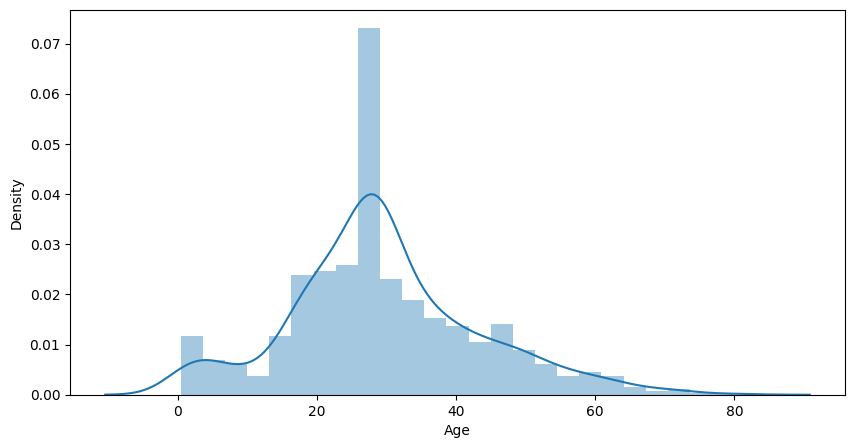

In [100]:
width = 10
height = 5

plt.style.use("default")

plt.figure(figsize=(width, height))

sns.distplot(preprocessed_dataset['Age'], )

plt.show()

<ipython-input-101-da31ad65d600>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_dataset[column], ax=axe)
<ipython-input-101-da31ad65d600>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_dataset[column], ax=axe)
<ipython-input-101-da31ad65d600>:9: UserWarning: 

`dist

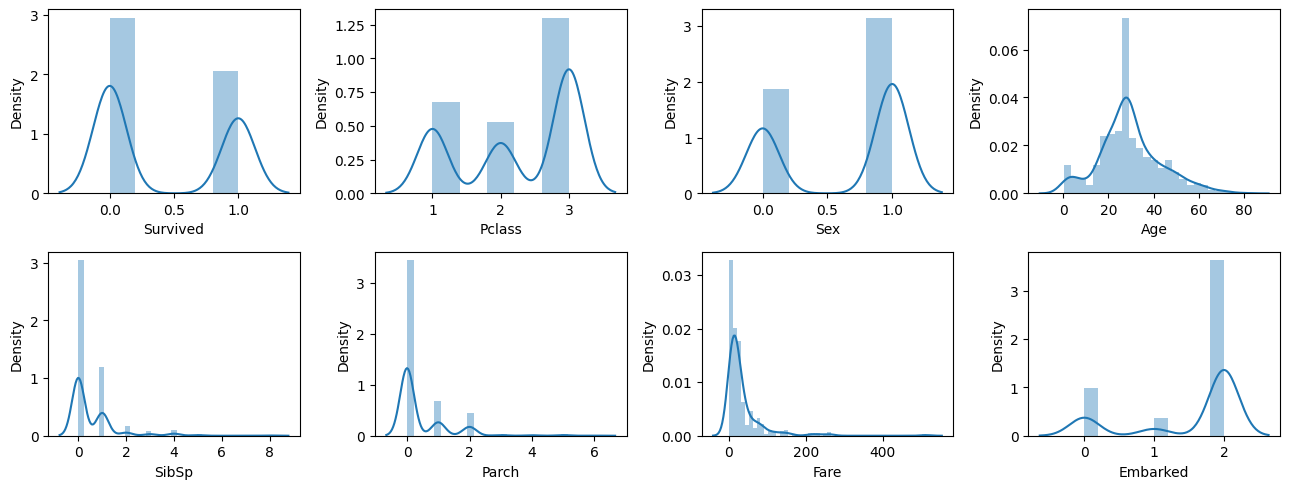

In [101]:
width = 13
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(width, height))

for column, axe in zip(preprocessed_dataset, axes.flatten()):
    sns.distplot(preprocessed_dataset[column], ax=axe)

plt.tight_layout()

## Dividimos la data

In [214]:
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
x = preprocessed_dataset.drop("Survived", axis=1)

y = preprocessed_dataset["Survived"]

In [215]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [216]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Vamos a separar la data en 2 conjuntos: uno para entrenar el modelo (**train set**) y otro para probar el modelo (**test set**).

In [217]:
#Mediante el método "train_test_split" usaremos el 20% de la data para probar el modelo. El parámetro "random state" nos sirve para
#poder replicar la misma separación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [218]:
print(f"Train shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")

Train shape: (622, 7)
Test shape: (156, 7)


# Entrenamiento y verificación de un árbol de clasificación

La librería [scikit-learn](http://scikit-learn.org) ofrece un conjunto de utilidades y funciones para aplicar los algoritmos más conocidos de machine learning. En su [documentación](http://scikit-learn.org/stable/documentation.html) se encuentran tutoriales y guías de usuario bien detalladas

Vamos a crear un modelo de árbol de decisión usando la clase **DecisionTreeClassifier**

Luego usando el método **fit** del modelo, vamos a entrenar el árbol

In [219]:
#Entrenamos el árbol de clasificación
model = DecisionTreeClassifier(max_depth=3)

model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [220]:
#Podemos verificar las etiquetas que tuvo que predecir nuestro árbol de clasificación
print("Etiquetas a predecir: {}".format(set(y_train)))

print("Etiquetas predecidas: {}".format(model.classes_))

Etiquetas a predecir: {0, 1}
Etiquetas predecidas: [0 1]


In [221]:
#Revisamos el "accuracy" (exactitud) obtenido
model.score(x_train, y_train)

0.8086816720257235

In [222]:
#Probamos el modelo en la data de prueba; para ello, revisamos el "accuracy" (exactitud)
model.score(x_test, y_test)

0.7948717948717948

# Visualización del árbol de clasificación

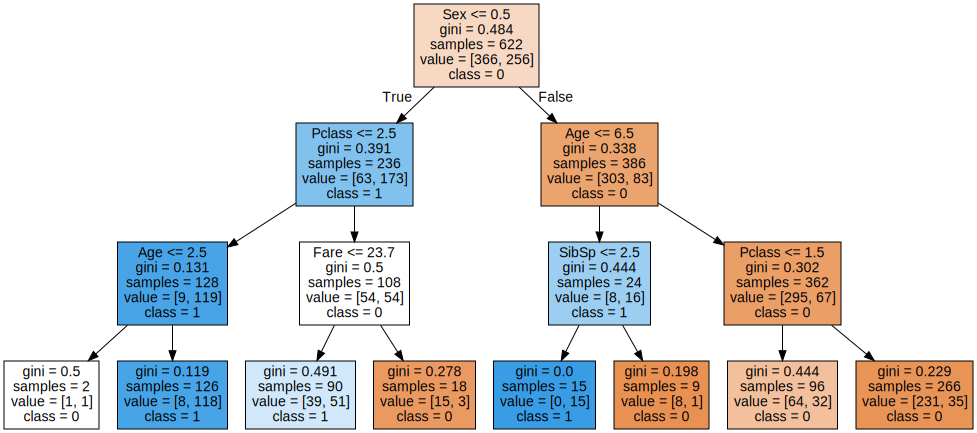

In [111]:
#@title Visualización de todo el árbol
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

classes = [(str(model_class) if isinstance(model_class, np.integer) else model_class) for model_class in model.classes_]

graph = Source(export_graphviz(model, feature_names=x.columns, class_names=classes, filled=True))

SVG(graph.pipe(format="svg"))

# Ejercicio

* Pre-procesar "titanic_test.csv" mediante la metadata guardada en el método "preprocess_dataset". Puede almacenar la metada que considere pertinente para lograr este objetivo; por ejemplo, almacenar las medianas usadas para completar los nulos y/o las columnas eliminadas
* Evaluar el resultado del árbol de decisión con la data "titanic_test.csv" pre-procesada
* Dividir la data "titanic_test.csv" pre-procesada en un conjunto de entrenamiento y prueba
* Entrenar un árbol de decisión con la data de entrenamiento
* Evaluar el resultado con la data de entrenamiento
* Evaluar el resultado con la data de validación
* Ver la documentacion del metodo DecisionTreeClassifier, experimentando con distintos parámetros y observe los resultados
  - ¿Qué parámetros le ayudan a incrementar la exactitud?
  - ¿Cómo cambia la exactitud en el conjunto de prueba?

#### Pregunta 1:
Pre-procesar "titanic_test.csv" mediante la metadata guardada en el método "preprocess_dataset". Puede almacenar la metada que considere pertinente para lograr este objetivo; por ejemplo, almacenar las medianas usadas para completar los nulos y/o las columnas eliminadas

In [135]:
# Leemos el archivo de test
test_x_df = pd.read_csv("titanic_test.csv")

# Leemos el target
test_y_df = pd.read_csv("labels_for_titanic_test.csv")

print(test_x_df.shape)
print(list(test_x_df.columns))
print()
print(test_y_df.shape)
print(list(test_y_df.columns))

# Unimos los datasets, no podemos asumir que estan en orden
test_df = pd.merge(test_x_df, test_y_df, on="PassengerId")
test_df.head()

(418, 11)
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

(418, 2)
['PassengerId', 'Survived']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [160]:
# Creamos una funcion preprocesamiento para test con los datos calculados en train
def preprocesar_dataframe(df, file_paths):
  loaded_data = {}
  for file_path in file_paths:
      with open(file_path, "rb") as f:
          file_name = file_path.split("/")[-1].split(".")[0]  # Extract the file name
          loaded_data[file_name] = pickle.load(f)

  # Cargamos los valores para imputar y eliminar columnas
  numeric_columns = loaded_data['numeric_columns']
  categorical_columns = loaded_data['categorical_columns']
  categorical_columns_filtered = loaded_data['categorical_columns_filtered']
  columns_to_filter_categories = loaded_data['columns_to_filter_categories']
  columns_to_filter_missings = loaded_data['columns_to_filter_missings']
  dictionary_of_columns_with_index_to_categorical = loaded_data['dictionary_of_columns_with_index_to_categorical']
  dictionary_of_columns_with_categorical_to_index = loaded_data['dictionary_of_columns_with_categorical_to_index']
  median_of_numeric_columns = loaded_data['median_of_numeric_columns']
  median_of_categorical_columns = loaded_data['median_of_categorical_columns']

  # Generamos una copia para no modificar el original
  preprocessed_dataset = df.copy()

  #Eliminamos las variables filtradas por muchas categorias
  preprocessed_dataset.drop(columns_to_filter_categories, axis=1, inplace=True)

  #Eliminamos las variables filtradas por missings
  preprocessed_dataset.drop(columns_to_filter_missings, axis=1, inplace=True)

  #Reemplazamos los nulos con la mediana de las columnas numericas
  preprocessed_dataset[numeric_columns] = preprocessed_dataset[numeric_columns].fillna(median_of_numeric_columns)

  #Transformamos a números las variables categóricas
  preprocessed_dataset.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)

  #Reemplazamos los nulos con la mediana de las variables categoricas convertidas a numeros
  preprocessed_dataset[categorical_columns_filtered].fillna(median_of_categorical_columns)

  return preprocessed_dataset

# Probamos la funcion
archivos_pkl = ["numeric_columns.pkl",
                "categorical_columns.pkl",
                "categorical_columns_filtered.pkl",
                "columns_to_filter_categories.pkl",
                "columns_to_filter_missings.pkl",
                "dictionary_of_columns_with_index_to_categorical.pkl",
                "dictionary_of_columns_with_categorical_to_index.pkl",
                "median_of_numeric_columns.pkl",
                "median_of_categorical_columns.pkl"]
test_preprocessed_df = preprocesar_dataframe(test_df,archivos_pkl)
test_preprocessed_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,1


#### Pregunta 2:
Evaluar el resultado del árbol de decisión con la data "titanic_test.csv" pre-procesada

In [162]:
# Con el dataset preprocesado, simplemente scoreamos la data
X_test = test_preprocessed_df.drop("Survived", axis=1)
y_test = test_preprocessed_df["Survived"]
model.score(X_test, y_test)

0.9688995215311005

#### Pregunta 3:
Dividir la data "titanic_test.csv" pre-procesada en un conjunto de entrenamiento y prueba

In [179]:
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
X = test_preprocessed_df.drop("Survived", axis=1)
y = test_preprocessed_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
pd.DataFrame({
    'Universo': ["Original","Train", "Test"],
    'Filas': [X.shape[0], X_train.shape[0], X_test.shape[0]],
    'Columnas': [X.shape[1], X_train.shape[1], X_test.shape[1]]
})

,Universo,Filas,Columnas
0,Original,418,7
1,Train,334,7
2,Test,84,7


#### Pregunta 4:
Entrenar un árbol de decisión con la data de entrenamiento

In [180]:
# Entrenamos un árbol
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Pregunta 5:
Evaluar el resultado con la data de entrenamiento

In [181]:
model.score(X_train, y_train)

1.0

#### Pregunta 6:
Evaluar el resultado con la data de validación

In [184]:
model.score(X_test, y_test)

1.0

#### Pregunta 7:
Ver la documentacion del metodo DecisionTreeClassifier, experimentando con distintos parámetros y observe los resultados
- ¿Qué parámetros le ayudan a incrementar la exactitud?
- ¿Cómo cambia la exactitud en el conjunto de prueba?

**Respuestas**
1. Los parámetros que generalmente ayudan a aumentar la exactitud son max_depth, min_samples_split y min_samples_leaf. Ajustarlos adecuadamente puede evitar el sobreajuste y mejorar la capacidad del modelo para generalizar a datos no vistos.
2. En el conjunto de prueba la exactitud es similar dado que el el conjunto de datos es pequeño y causa overtifitting con gran facilidad

In [227]:
# Leemos la data original
with open("preprocessed_dataset_titanic_train.pkl", "rb") as f:
  dataset_train = pickle.load(f)

X = dataset_train.drop("Survived", axis=1)
y = dataset_train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Variamos los parametros
parameters = [
    {'max_depth': 1, 'min_samples_split': 2},
    {'max_depth': 2, 'min_samples_split': 3},
    {'max_depth': 3, 'min_samples_split': 4},
    {'max_depth': None, 'min_samples_split': 5},
]

for param in parameters:
    clf = DecisionTreeClassifier(**param)
    clf.fit(X_train, y_train)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    print(param)
    print("Score train:", score_train)
    print("Score test:", score_test)
    print()

{'max_depth': 1, 'min_samples_split': 2}
Score train: 0.8086816720257235
Score test: 0.7948717948717948

{'max_depth': 2, 'min_samples_split': 3}
Score train: 0.8086816720257235
Score test: 0.7948717948717948

{'max_depth': 3, 'min_samples_split': 4}
Score train: 0.8086816720257235
Score test: 0.7948717948717948

{'max_depth': None, 'min_samples_split': 5}
Score train: 0.8086816720257235
Score test: 0.7948717948717948

